# Machine Learning
### Project

### **House prices Dataset**

#### Import modules & read data

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
plt.style.use('ggplot')

df = pd.read_csv('train.csv', keep_default_na = False, low_memory=False)

In [50]:
df['PropertyType'] = ''
for i in range(len(df)):
    if df.loc[i,"SalePrice"] <= 150000:
        df.loc[i, 'PropertyType'] = 'LOW'
    elif df.loc[i,"SalePrice"] >= 150000 and df.loc[i,"SalePrice"] <= 300000:
        df.loc[i, 'PropertyType'] = 'MEDIUM'
    elif df.loc[i,"SalePrice"] >= 300000:
        df.loc[i, 'PropertyType'] = 'HIGH'

In [51]:
df = df[df.columns.difference(
    ['SalePrice'])]

### **Data Understanding**

##### **Data dimension (n_rows x n_columns)**

In [52]:
df.shape

(1460, 81)

##### **How many elements?**

In [53]:
df.size

118260

##### **Attributes**

In [54]:
print(df.columns.tolist())

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'PropertyType', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch', 'Stre

##### **Top 10 records**

In [55]:
df.head(10)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0    NA             3     1Fam       TA   
1      1262         0          0    NA             3     1Fam       TA   
2       920       866          0    NA             3     1Fam       TA   
3       961       756          0    NA             3     1Fam       Gd   
4      1145      1053          0    NA             4     1Fam       TA   
5       796       566        320    NA             1     1Fam       TA   
6      1694         0          0    NA             3     1Fam       TA   
7      1107       983          0    NA             3     1Fam       TA   
8      1022       752          0    NA             2     1Fam       TA   
9      1077         0          0    NA             2   2fmCon       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleType ScreenPorch  Street  \
0           No         706           0  ...       WD           0    Pave   
1           Gd         978           0  ...       WD           0    Pave   
2           Mn         486           0  ...       WD           0    Pave   
3           No         216           0  ...       WD           0    Pave   
4           Av         655           0  ...       WD           0    Pave   
5           No         732           0  ...       WD           0    Pave   
6           Av        1369           0  ...       WD           0    Pave   
7           Mn         859          32  ...       WD           0    Pave   
8           No           0           0  ...       WD           0    Pave   
9           No         851           0  ...       WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0             8         856     AllPub          0      2003         2003   
1             6        1262     AllPub        298      1976         1976   
2             6         920     AllPub          0      2001         2002   
3             7         756     AllPub          0      1915         1970   
4             9        1145     AllPub        192      2000         2000   
5             5         796     AllPub         40      1993         1995   
6             7        1686     AllPub        255      2004         2005   
7             7        1107     AllPub        235      1973         1973   
8             8         952     AllPub         90      1931         1950   
9             5         991     AllPub          0      1939         1950   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  
5   2009  
6   2007  
7   2009  
8   2008  
9   2008  

[10 rows x 81 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   1stFlrSF       1460 non-null   int64 
 1   2ndFlrSF       1460 non-null   int64 
 2   3SsnPorch      1460 non-null   int64 
 3   Alley          1460 non-null   object
 4   BedroomAbvGr   1460 non-null   int64 
 5   BldgType       1460 non-null   object
 6   BsmtCond       1460 non-null   object
 7   BsmtExposure   1460 non-null   object
 8   BsmtFinSF1     1460 non-null   int64 
 9   BsmtFinSF2     1460 non-null   int64 
 10  BsmtFinType1   1460 non-null   object
 11  BsmtFinType2   1460 non-null   object
 12  BsmtFullBath   1460 non-null   int64 
 13  BsmtHalfBath   1460 non-null   int64 
 14  BsmtQual       1460 non-null   object
 15  BsmtUnfSF      1460 non-null   int64 
 16  CentralAir     1460 non-null   object
 17  Condition1     1460 non-null   object
 18  Condition2     1460 non-null

#### **Convert wrong attribute types and fill wrong NA values**

In [57]:
for attribute in df.columns:
    if df[attribute].dtype == object:
        df[attribute] = df[attribute].astype('category')

df['Id'] = df['Id'].astype('category')
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['YearBuilt'] = df['YearBuilt'].astype('category')
df['YearRemodAdd'] = df['YearRemodAdd'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')
df['YrSold'] = df['YrSold'].astype('category')
df['OverallQual'] = df['OverallQual'].astype('category')
df['OverallCond'] = df['OverallCond'].astype('category')

#delete all NA values and eventually converting the field
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['LotFrontage'] = df['LotFrontage'].astype('int64')

df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')

temp = df
#TODO
df['Electrical'] = df['Electrical'].replace('NA', 'SBrkr')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   1stFlrSF       1460 non-null   int64   
 1   2ndFlrSF       1460 non-null   int64   
 2   3SsnPorch      1460 non-null   int64   
 3   Alley          1460 non-null   category
 4   BedroomAbvGr   1460 non-null   int64   
 5   BldgType       1460 non-null   category
 6   BsmtCond       1460 non-null   category
 7   BsmtExposure   1460 non-null   category
 8   BsmtFinSF1     1460 non-null   int64   
 9   BsmtFinSF2     1460 non-null   int64   
 10  BsmtFinType1   1460 non-null   category
 11  BsmtFinType2   1460 non-null   category
 12  BsmtFullBath   1460 non-null   int64   
 13  BsmtHalfBath   1460 non-null   int64   
 14  BsmtQual       1460 non-null   category
 15  BsmtUnfSF      1460 non-null   int64   
 16  CentralAir     1460 non-null   category
 17  Condition1     1460 non-null   ca

#### **Are there any null values?**

In [59]:
df.isna().sum()

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
               ..
Utilities       0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 81, dtype: int64

##### **Get general statistics**

In [60]:
df.describe().T

count          mean          std     min      25%     50%  \
1stFlrSF       1460.0   1162.626712   386.587738   334.0   882.00  1087.0   
2ndFlrSF       1460.0    346.992466   436.528436     0.0     0.00     0.0   
3SsnPorch      1460.0      3.409589    29.317331     0.0     0.00     0.0   
BedroomAbvGr   1460.0      2.866438     0.815778     0.0     2.00     3.0   
BsmtFinSF1     1460.0    443.639726   456.098091     0.0     0.00   383.5   
BsmtFinSF2     1460.0     46.549315   161.319273     0.0     0.00     0.0   
BsmtFullBath   1460.0      0.425342     0.518911     0.0     0.00     0.0   
BsmtHalfBath   1460.0      0.057534     0.238753     0.0     0.00     0.0   
BsmtUnfSF      1460.0    567.240411   441.866955     0.0   223.00   477.5   
EnclosedPorch  1460.0     21.954110    61.119149     0.0     0.00     0.0   
Fireplaces     1460.0      0.613014     0.644666     0.0     0.00     1.0   
FullBath       1460.0      1.565068     0.550916     0.0     1.00     2.0   
GarageArea     1460.0    472.980137   213.804841     0.0   334.50   480.0   
GarageCars     1460.0      1.767123     0.747315     0.0     1.00     2.0   
GrLivArea      1460.0   1515.463699   525.480383   334.0  1129.50  1464.0   
HalfBath       1460.0      0.382877     0.502885     0.0     0.00     0.0   
KitchenAbvGr   1460.0      1.046575     0.220338     0.0     1.00     1.0   
LotArea        1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
LotFrontage    1460.0     69.863699    22.027677    21.0    60.00    69.0   
LowQualFinSF   1460.0      5.844521    48.623081     0.0     0.00     0.0   
MasVnrArea     1460.0    103.117123   180.731373     0.0     0.00     0.0   
MiscVal        1460.0     43.489041   496.123024     0.0     0.00     0.0   
OpenPorchSF    1460.0     46.660274    66.256028     0.0     0.00    25.0   
PoolArea       1460.0      2.758904    40.177307     0.0     0.00     0.0   
ScreenPorch    1460.0     15.060959    55.757415     0.0     0.00     0.0   
TotRmsAbvGrd   1460.0      6.517808     1.625393     2.0     5.00     6.0   
TotalBsmtSF    1460.0   1057.429452   438.705324     0.0   795.75   991.5   
WoodDeckSF     1460.0     94.244521   125.338794     0.0     0.00     0.0   

                    75%       max  
1stFlrSF        1391.25    4692.0  
2ndFlrSF         728.00    2065.0  
3SsnPorch          0.00     508.0  
BedroomAbvGr       3.00       8.0  
BsmtFinSF1       712.25    5644.0  
BsmtFinSF2         0.00    1474.0  
BsmtFullBath       1.00       3.0  
BsmtHalfBath       0.00       2.0  
BsmtUnfSF        808.00    2336.0  
EnclosedPorch      0.00     552.0  
Fireplaces         1.00       3.0  
FullBath           2.00       3.0  
GarageArea       576.00    1418.0  
GarageCars         2.00       4.0  
GrLivArea       1776.75    5642.0  
HalfBath           1.00       2.0  
KitchenAbvGr       1.00       3.0  
LotArea        11601.50  215245.0  
LotFrontage       79.00     313.0  
LowQualFinSF       0.00     572.0  
MasVnrArea       164.25    1600.0  
MiscVal            0.00   15500.0  
OpenPorchSF       68.00     547.0  
PoolArea           0.00     738.0  
ScreenPorch        0.00     480.0  
TotRmsAbvGrd       7.00      14.0  
TotalBsmtSF     1298.25    6110.0  
WoodDeckSF       168.00     857.0

In [61]:
df.describe(include = 'category').T

count unique      top  freq
Alley          1460      3       NA  1369
BldgType       1460      5     1Fam  1220
BsmtCond       1460      5       TA  1311
BsmtExposure   1460      5       No   953
BsmtFinType1   1460      7      Unf   430
BsmtFinType2   1460      7      Unf  1256
BsmtQual       1460      5       TA   649
CentralAir     1460      2        Y  1365
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
Electrical     1460      5    SBrkr  1335
ExterCond      1460      5       TA  1282
ExterQual      1460      4       TA   906
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
Fence          1460      5       NA  1179
FireplaceQu    1460      6       NA   690
Foundation     1460      6    PConc   647
Functional     1460      7      Typ  1360
GarageCond     1460      6       TA  1326
GarageFinish   1460      4      Unf   605
GarageQual     1460      6       TA  1311
GarageType     1460      7   Attchd   870
GarageYrBlt    1460     98       NA    81
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
HouseStyle     1460      8   1Story   726
Id             1460   1460        1     1
KitchenQual    1460      4       TA   735
LandContour    1460      4      Lvl  1311
LandSlope      1460      3      Gtl  1382
LotConfig      1460      5   Inside  1052
LotShape       1460      4      Reg   925
MSSubClass     1460     15       20   536
MSZoning       1460      5       RL  1151
MasVnrType     1460      5     None   864
MiscFeature    1460      5       NA  1406
MoSold         1460     12        6   253
Neighborhood   1460     25    NAmes   225
OverallCond    1460      9        5   821
OverallQual    1460     10        5   397
PavedDrive     1460      3        Y  1340
PoolQC         1460      4       NA  1453
PropertyType   1460      3   MEDIUM   726
RoofMatl       1460      8  CompShg  1434
RoofStyle      1460      6    Gable  1141
SaleCondition  1460      6   Normal  1198
SaleType       1460      9       WD  1267
Street         1460      2     Pave  1454
Utilities      1460      2   AllPub  1459
YearBuilt      1460    112     2006    67
YearRemodAdd   1460     61     1950   178
YrSold         1460      5     2009   338

##### **Building histograms**

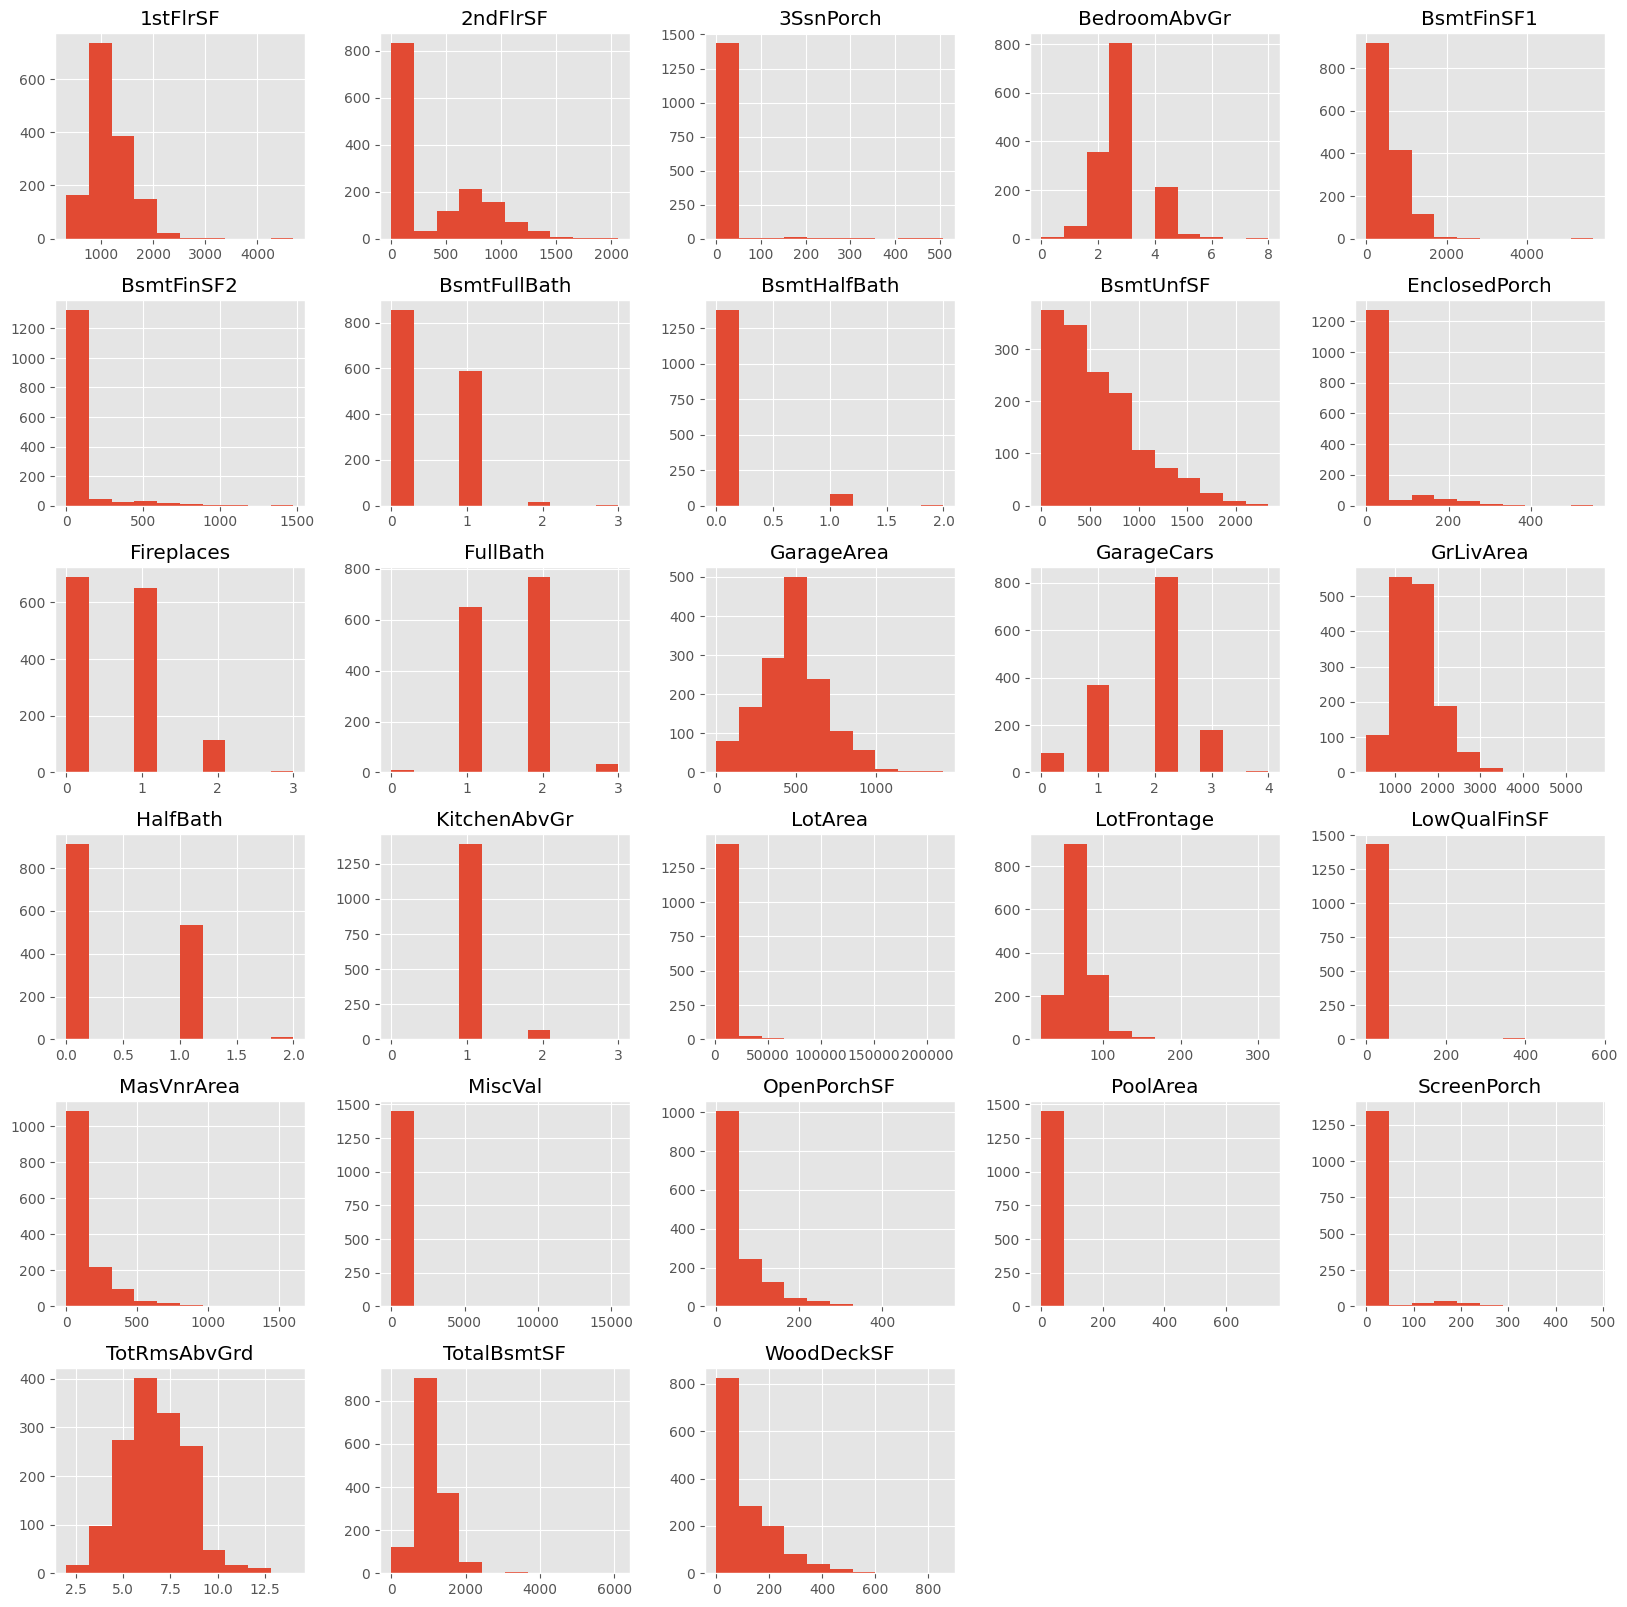

In [62]:
temp = []

for attribute in df.columns:
         if df[attribute].dtype == 'category':
            temp.append(attribute)
            
numericDF = df[df.columns.difference(temp)]

numericDF.hist(figsize = (20, 20))
plt.show()

##### **Bar plots for categorical attributes**

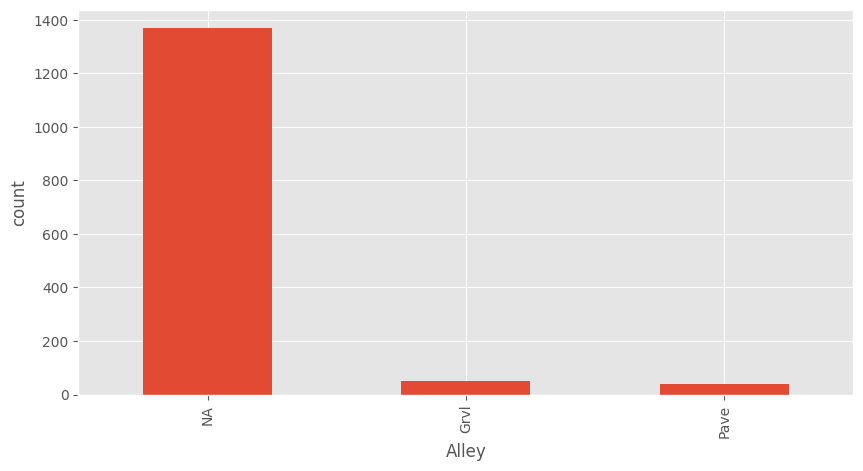

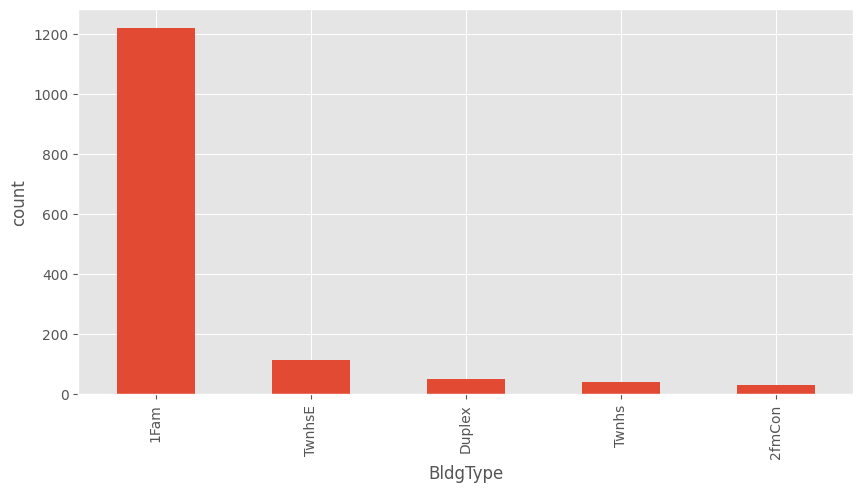

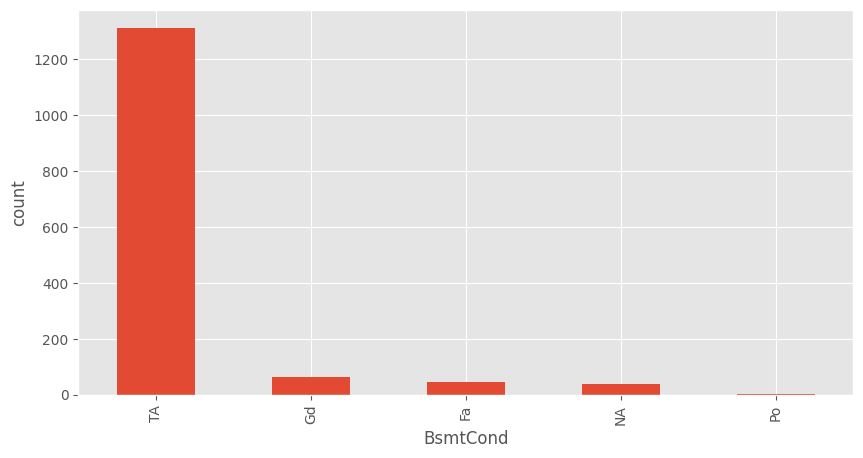

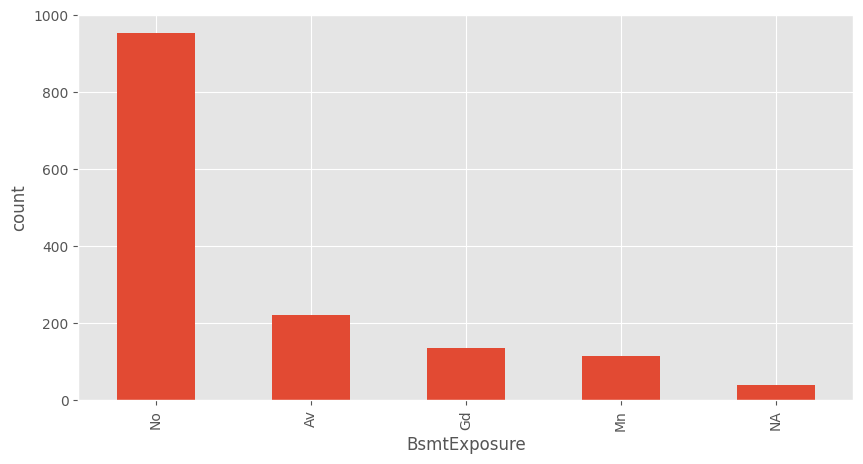

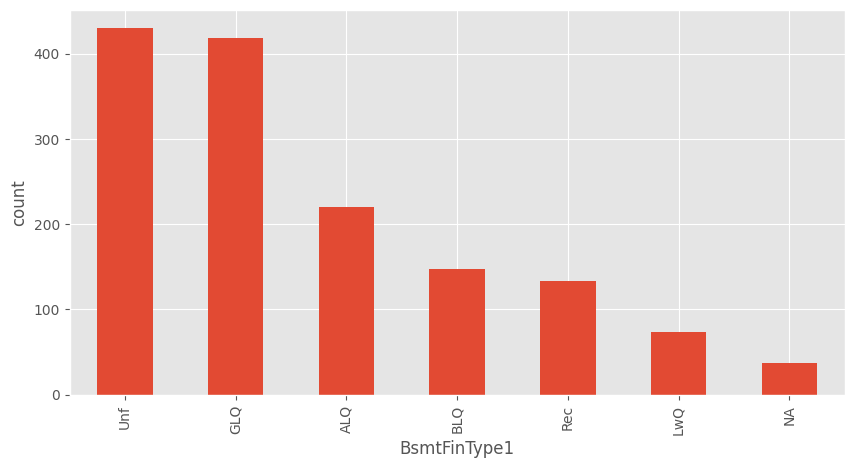

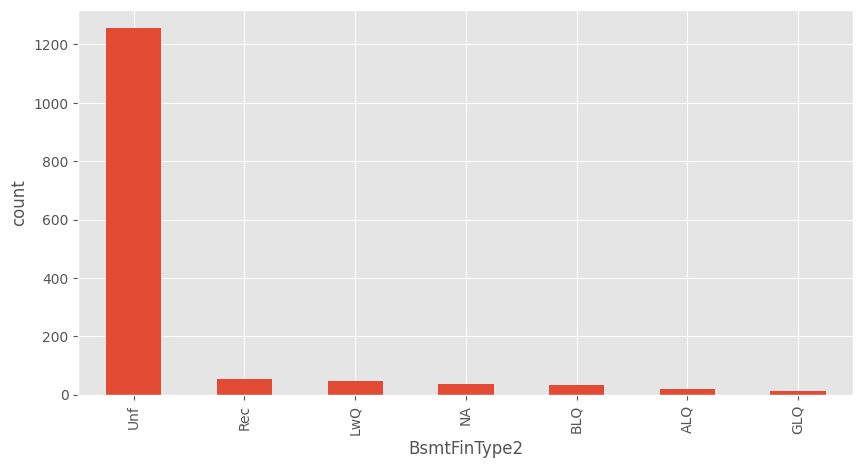

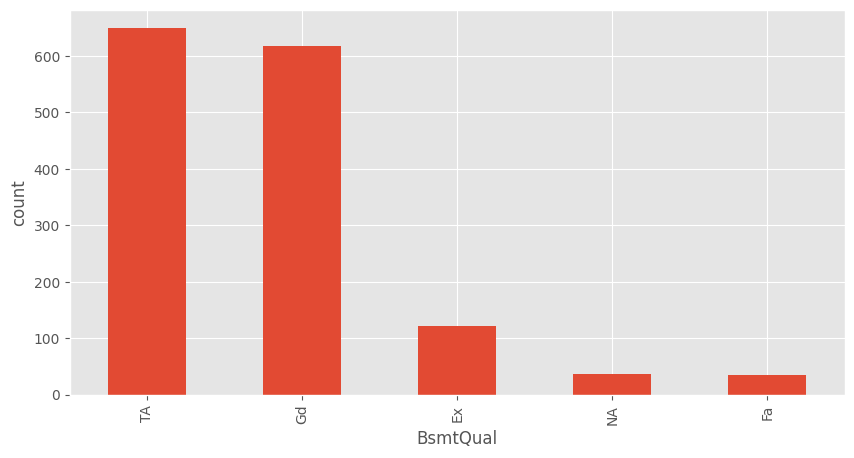

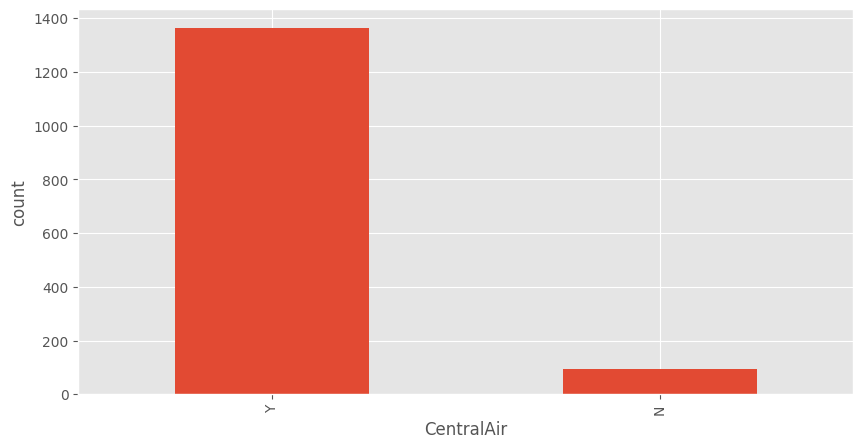

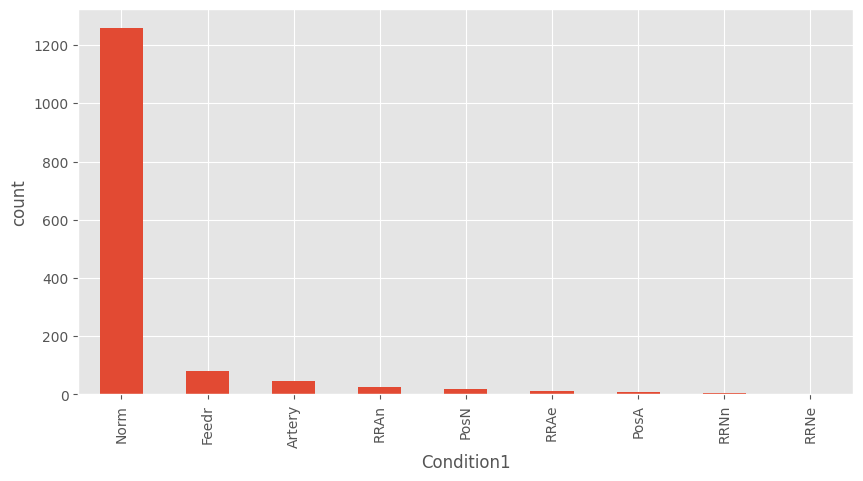

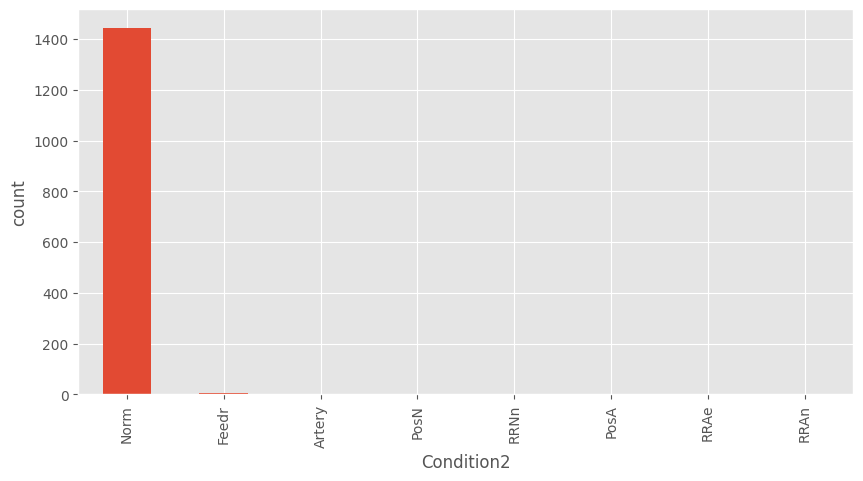

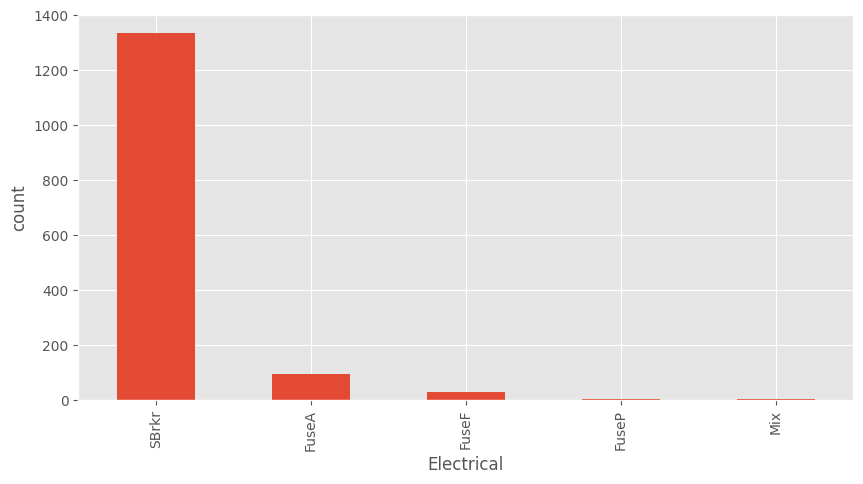

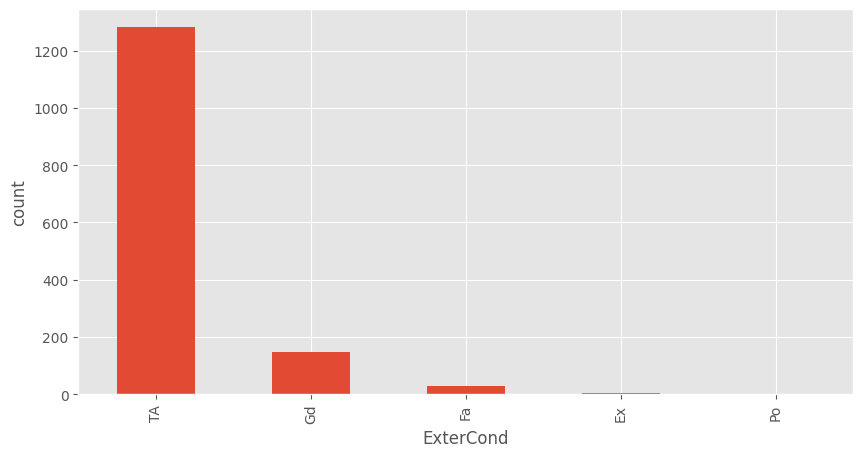

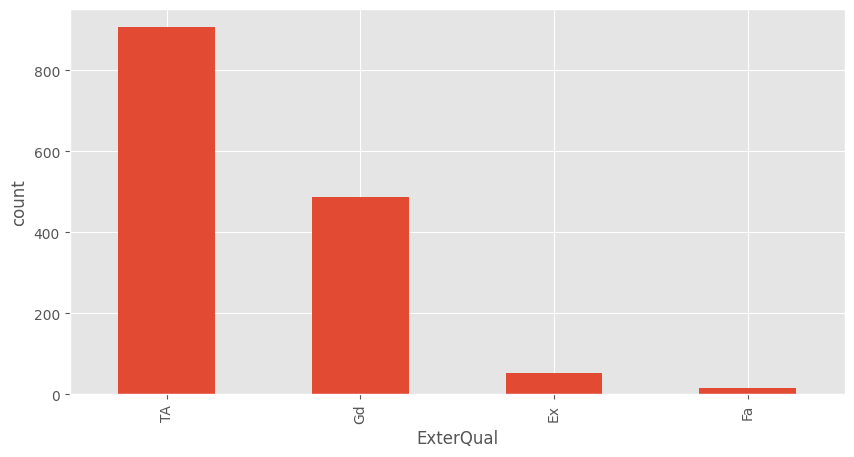

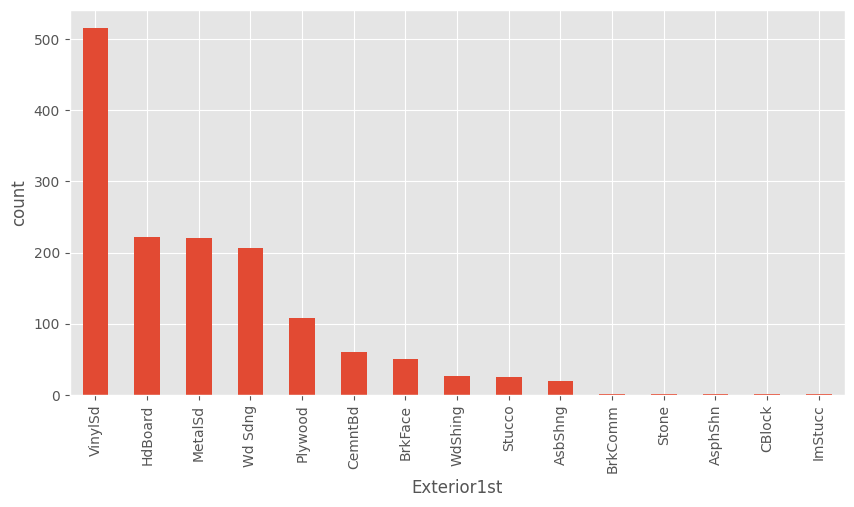

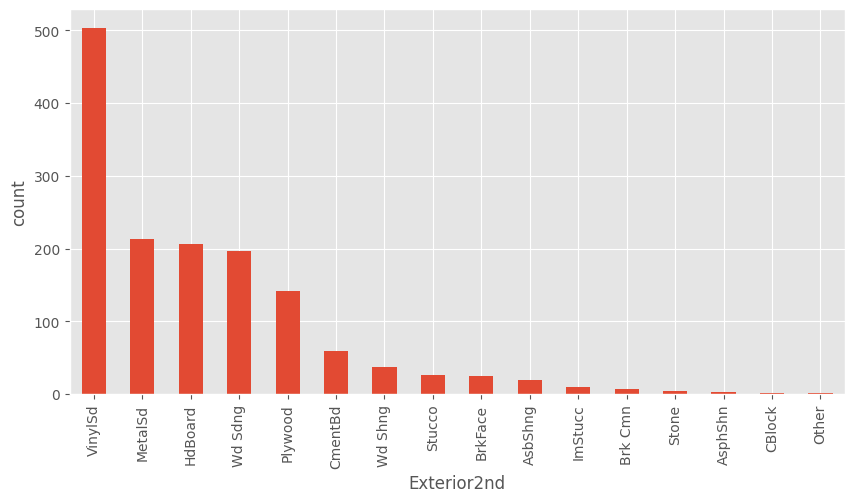

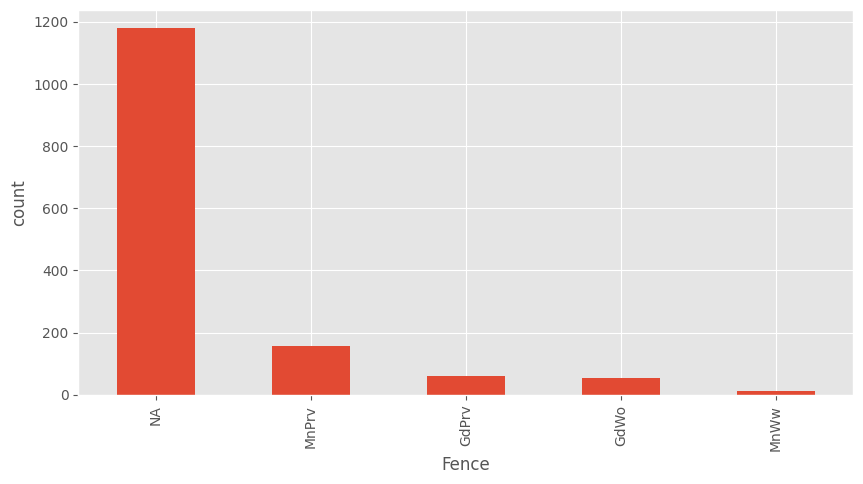

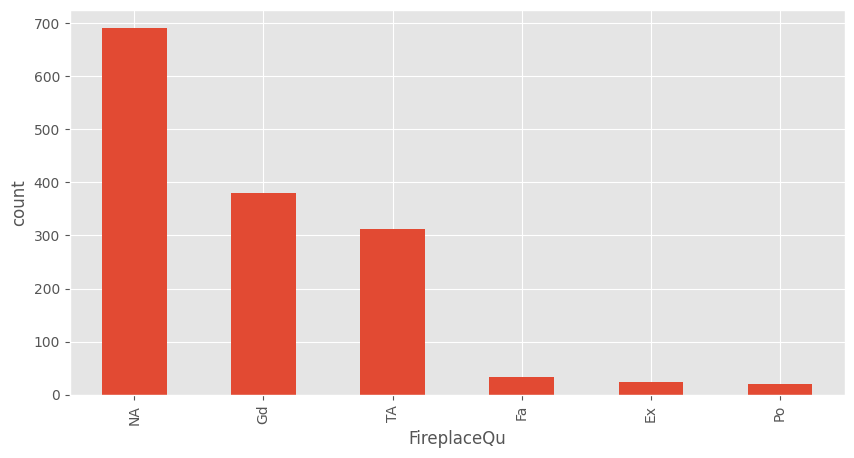

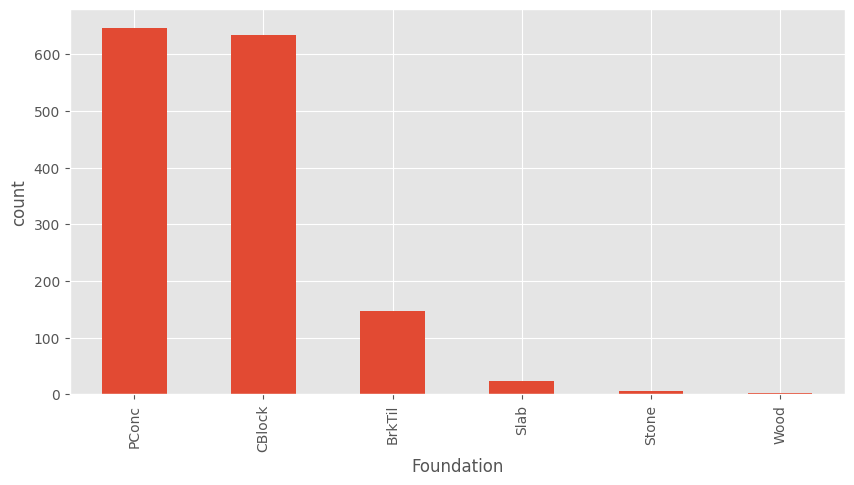

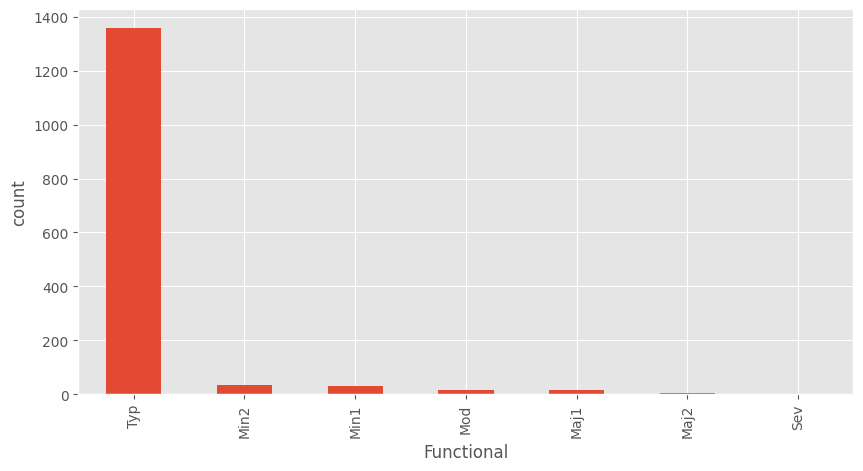

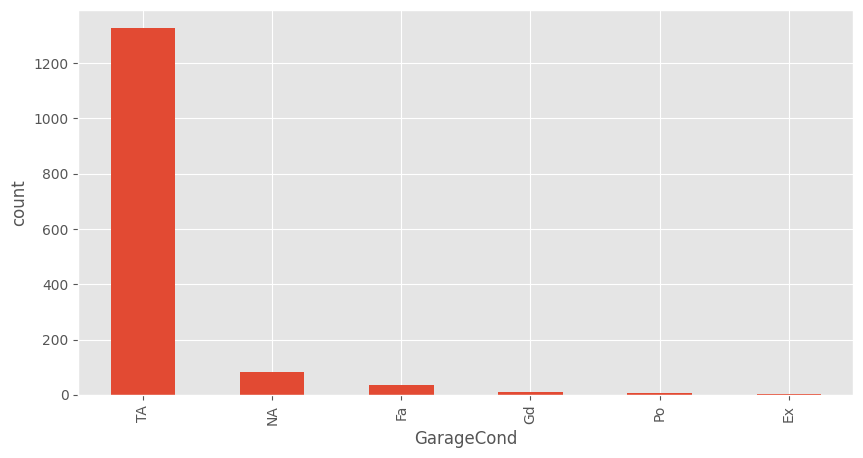

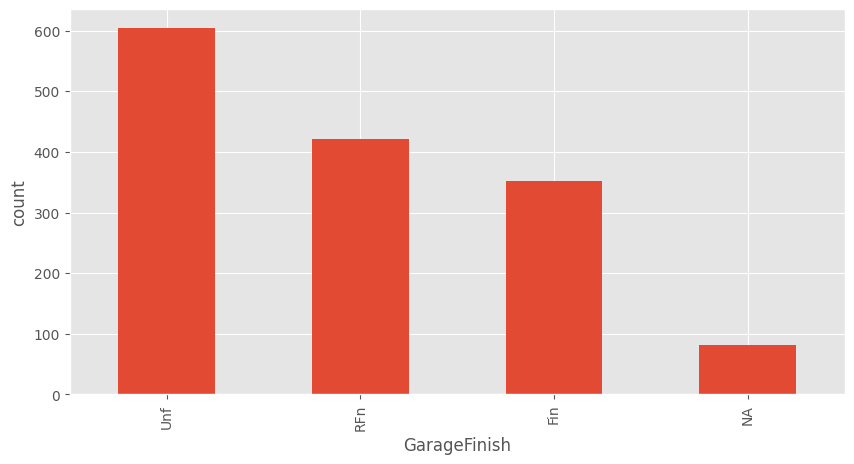

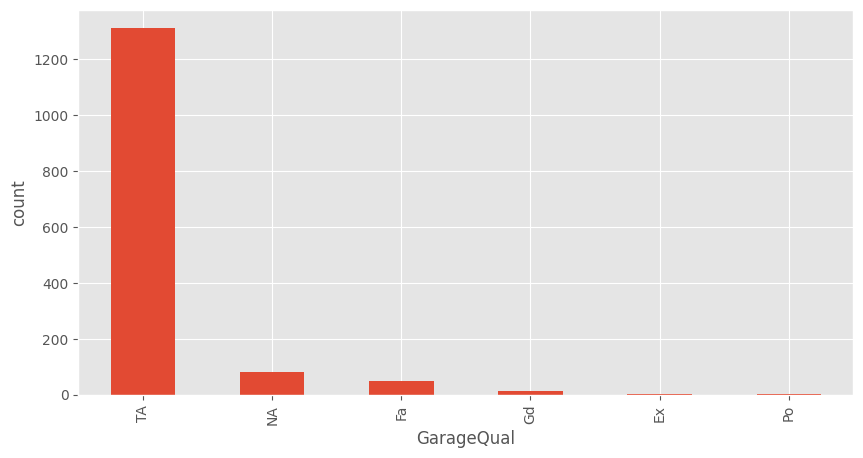

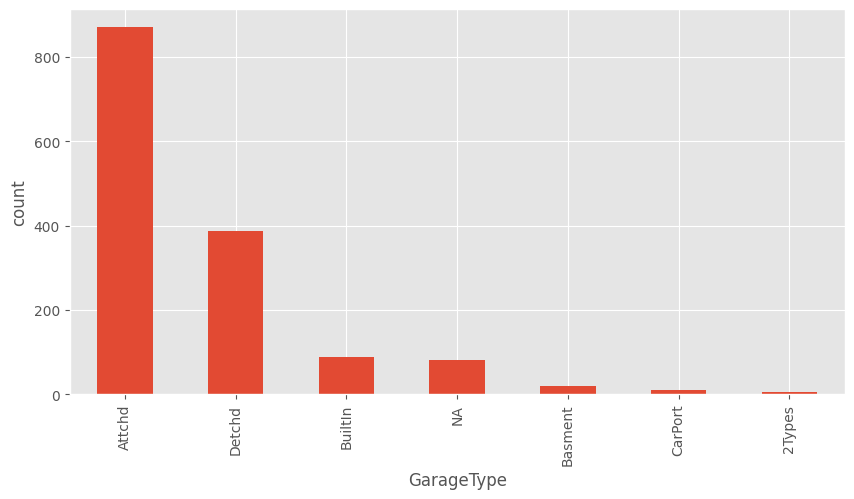

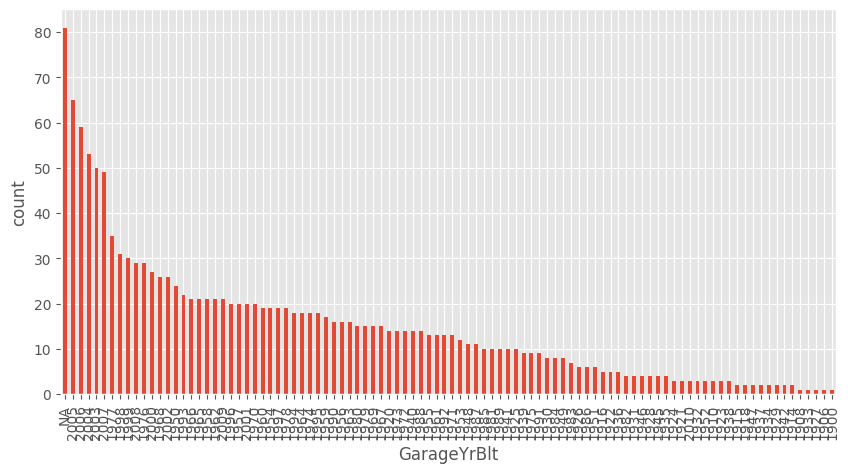

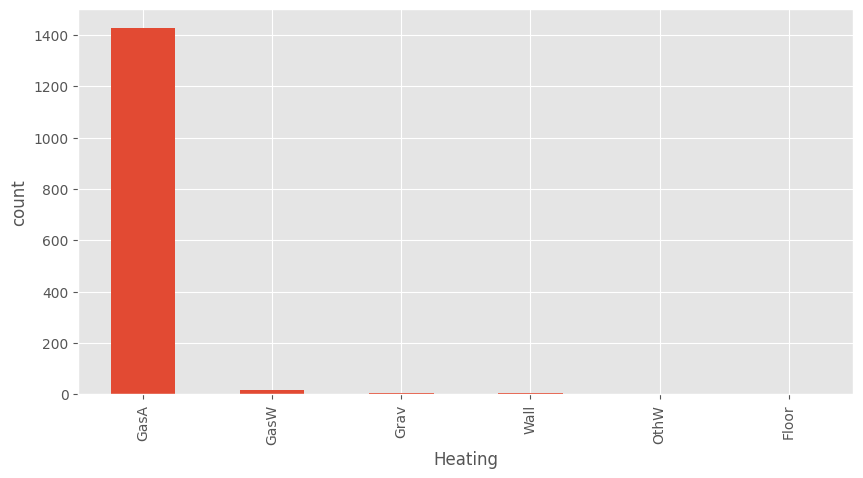

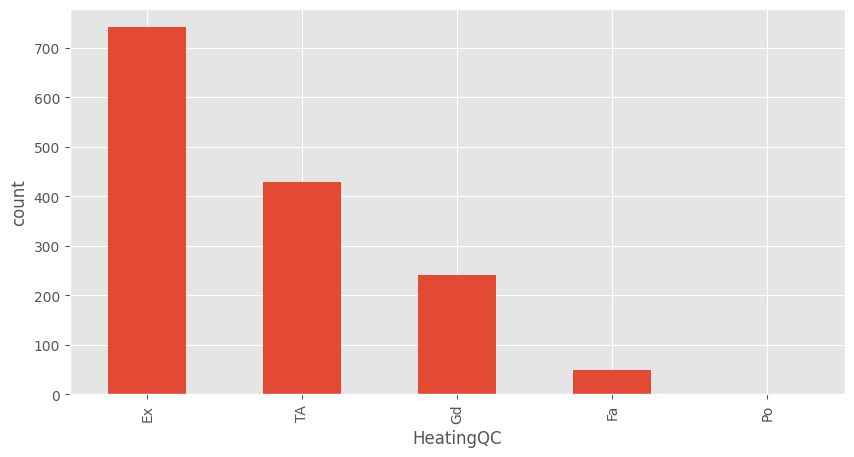

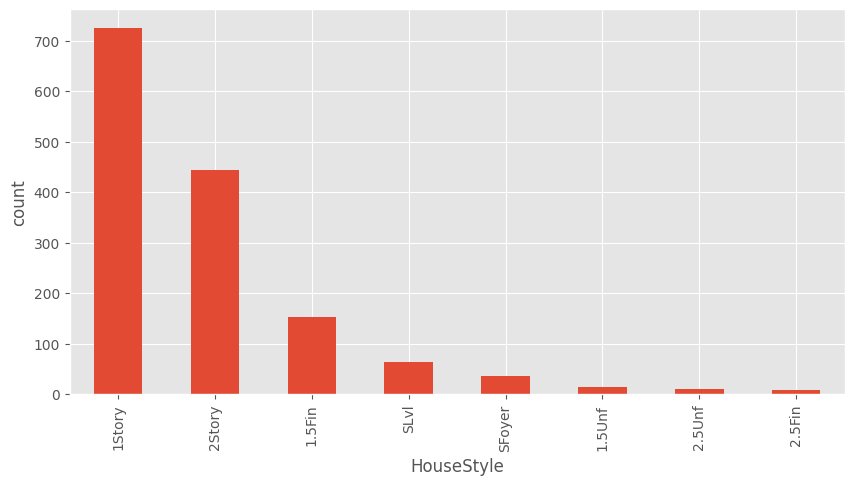

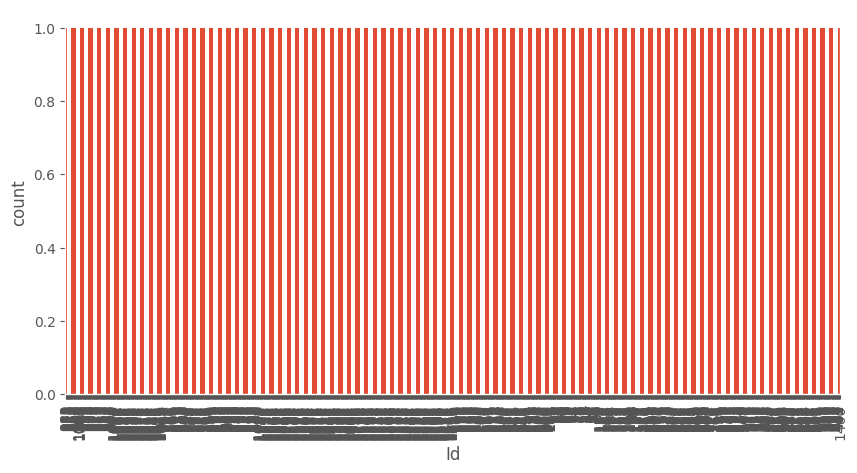

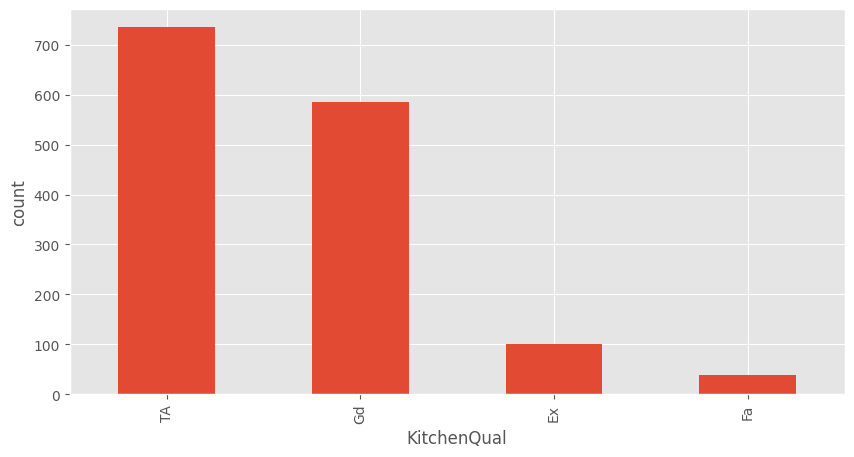

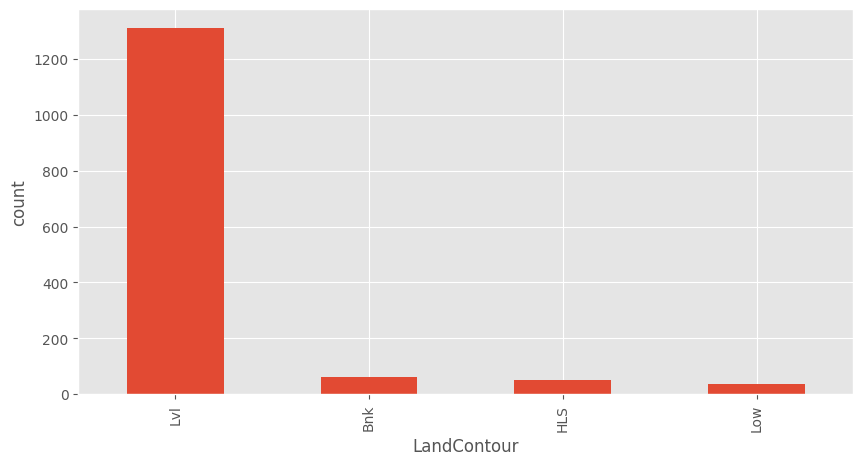

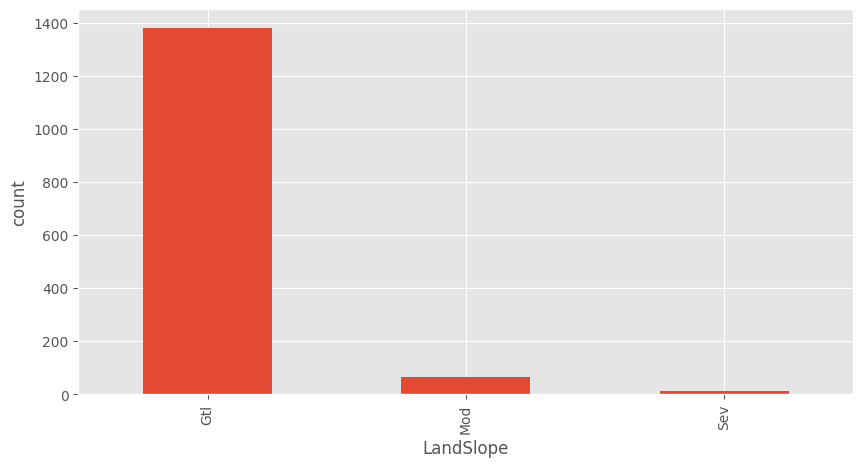

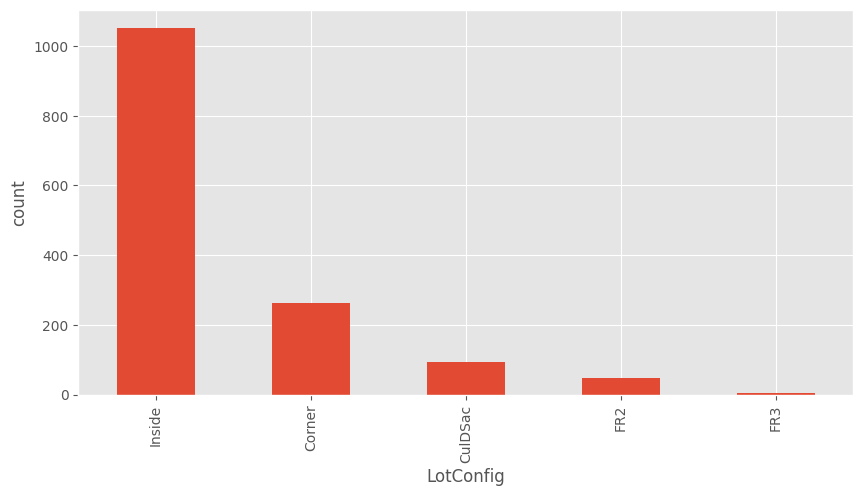

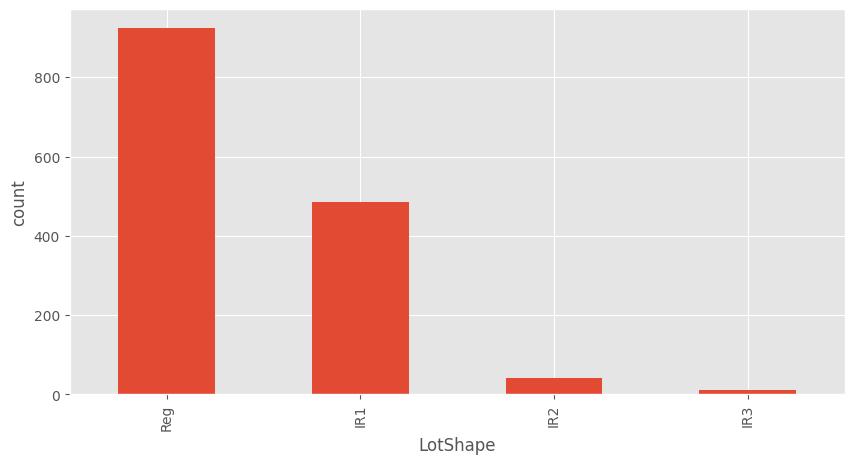

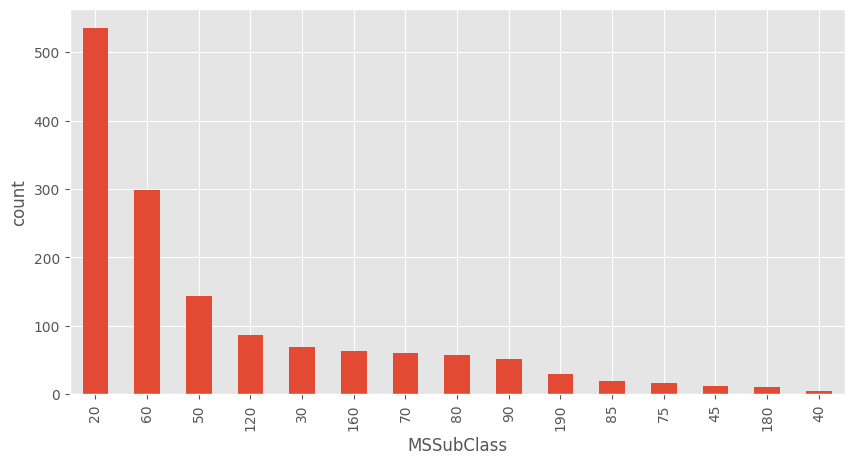

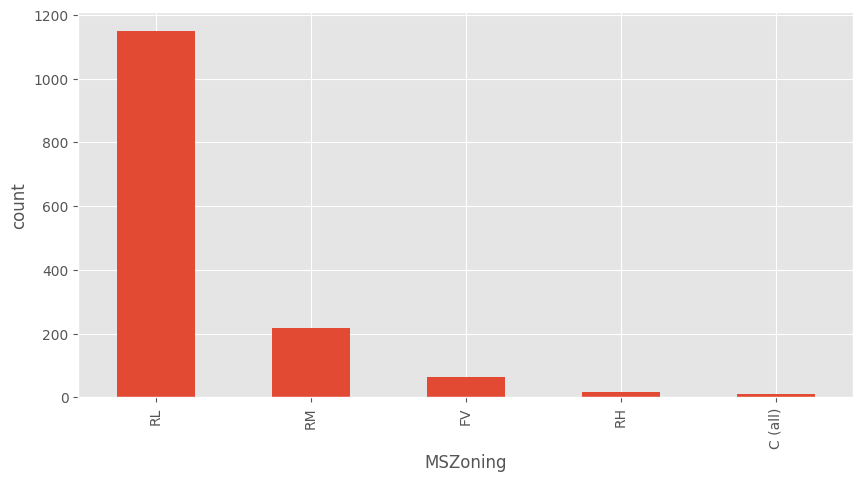

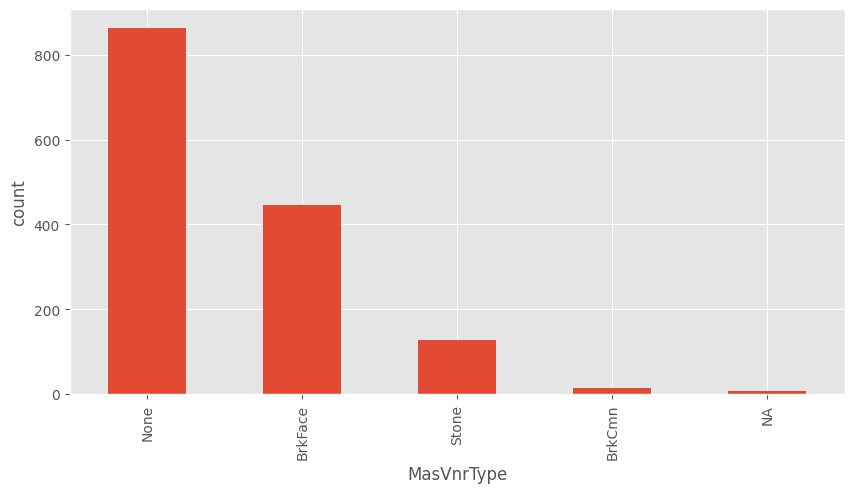

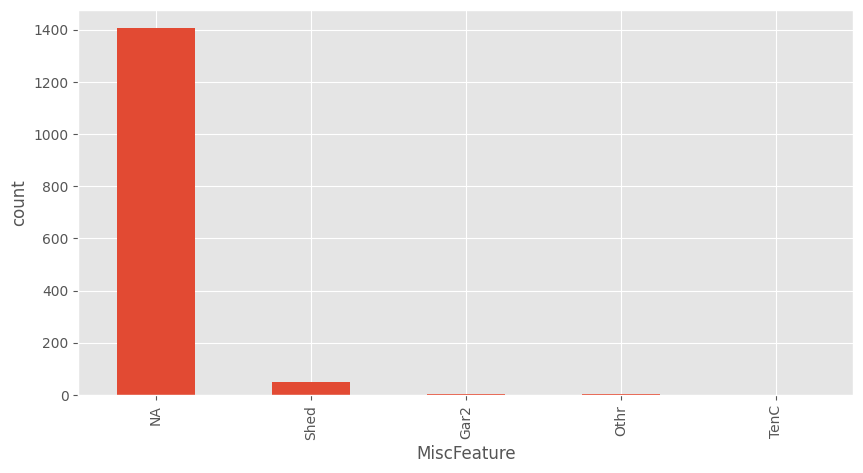

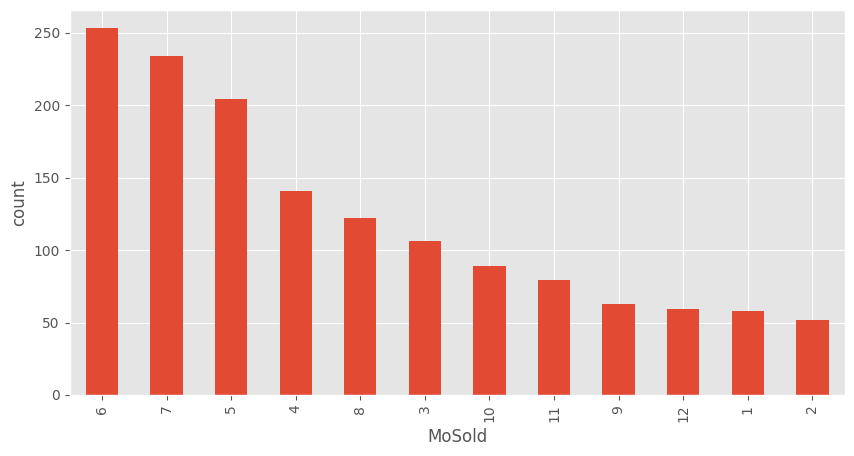

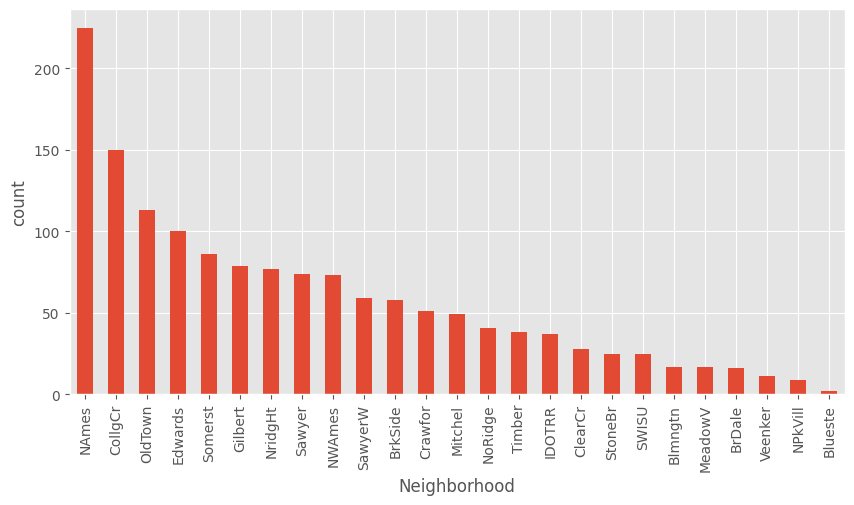

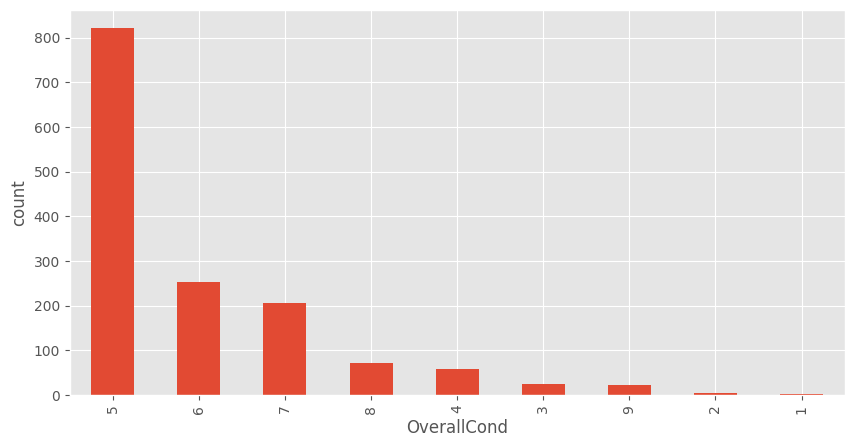

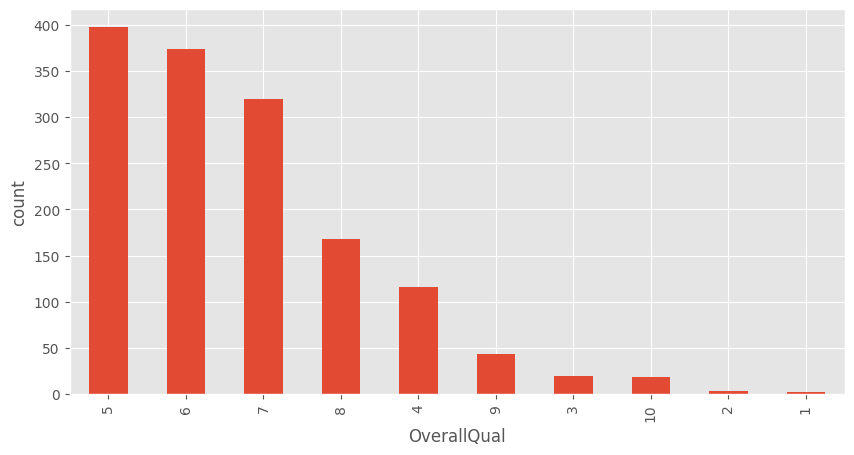

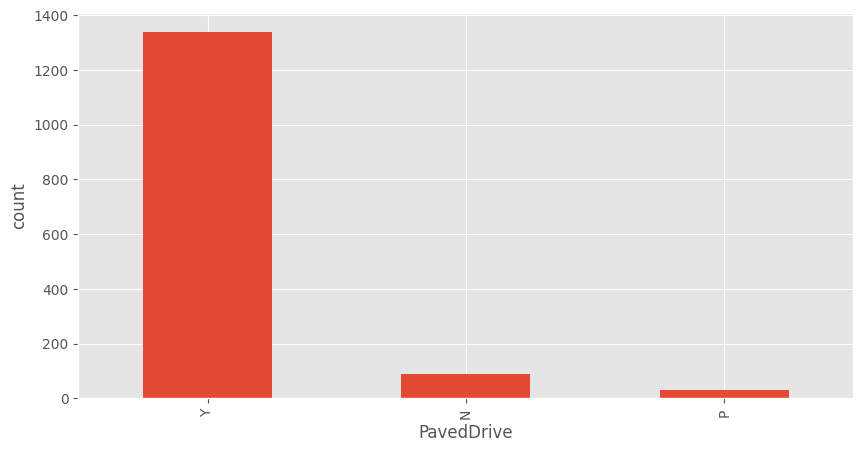

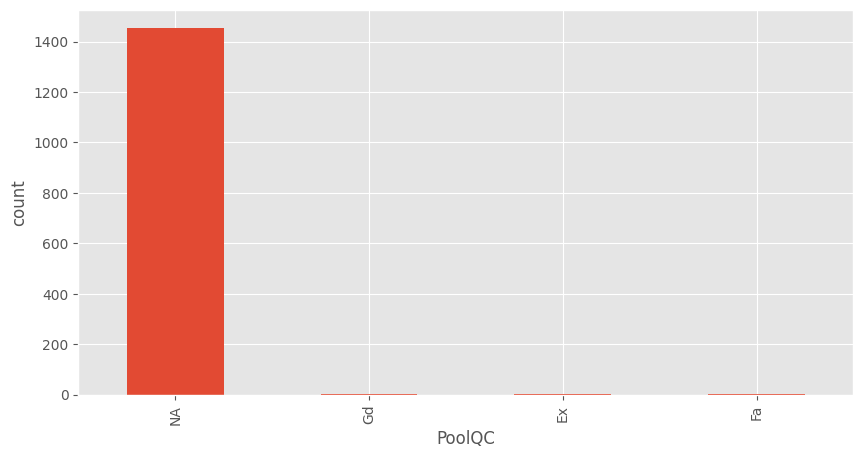

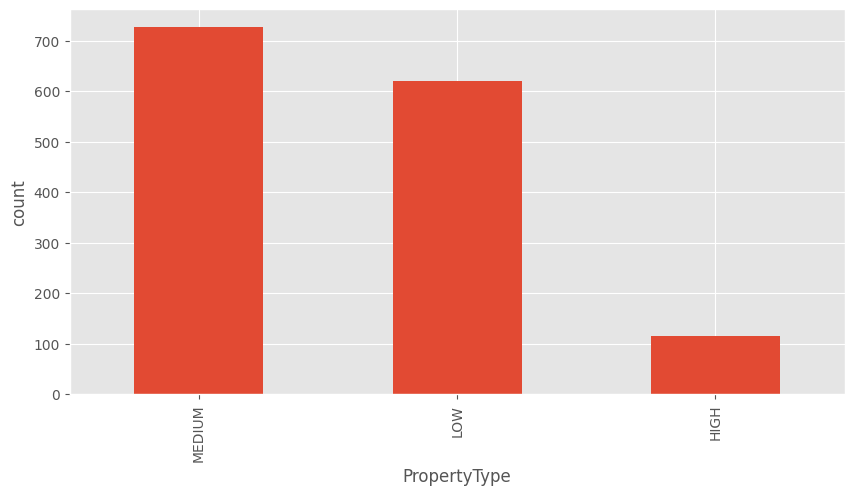

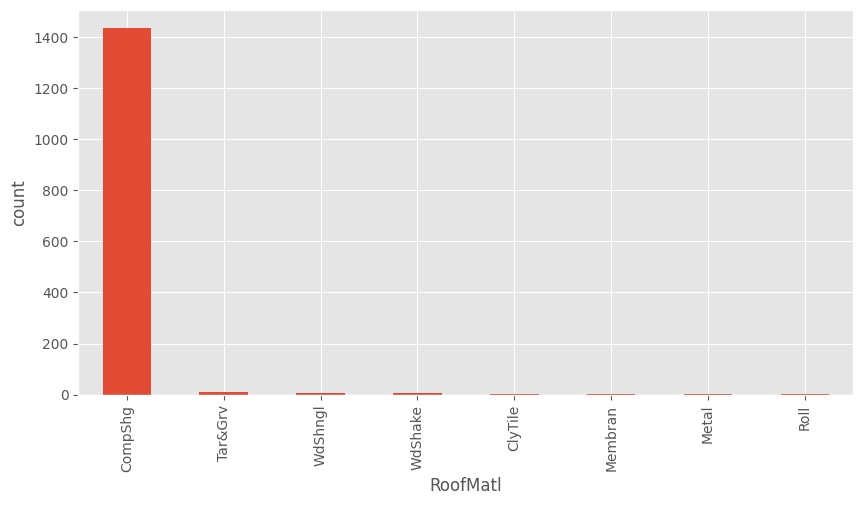

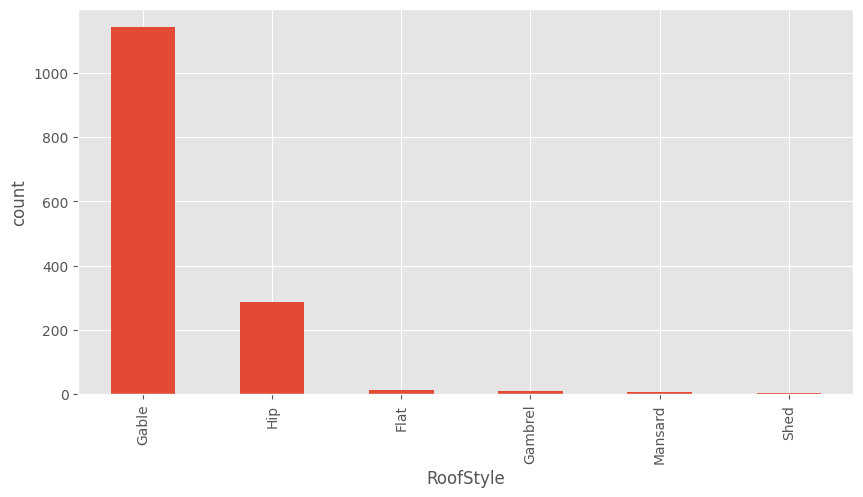

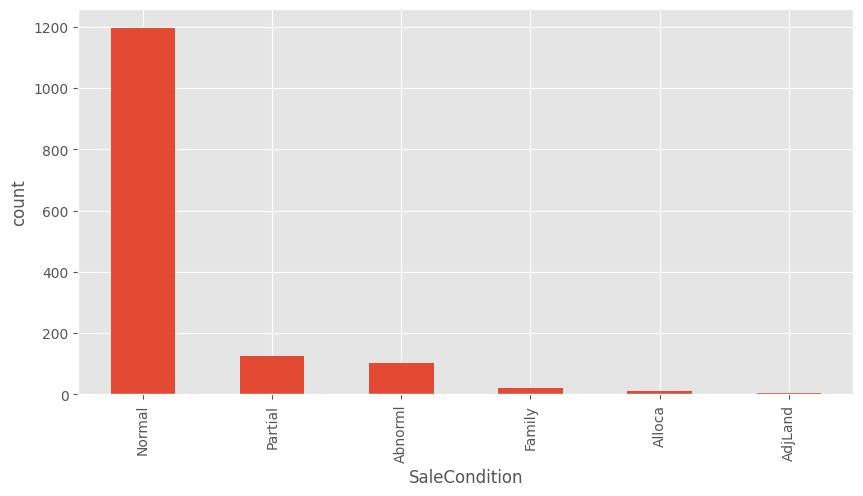

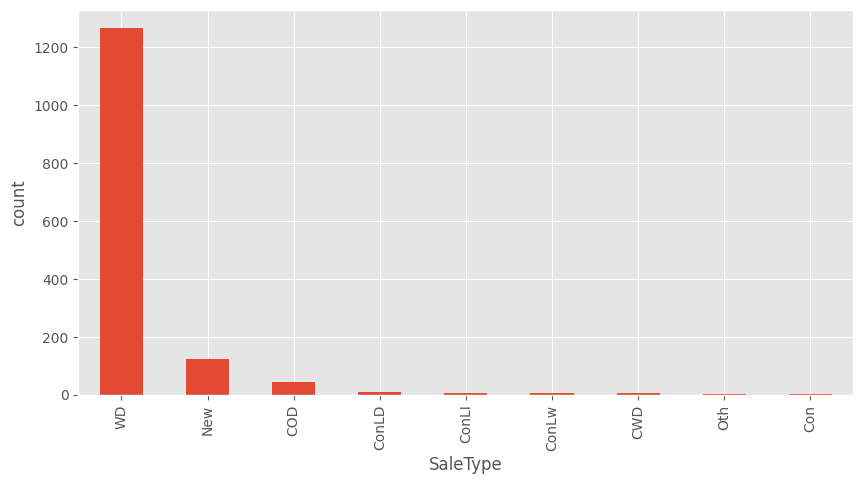

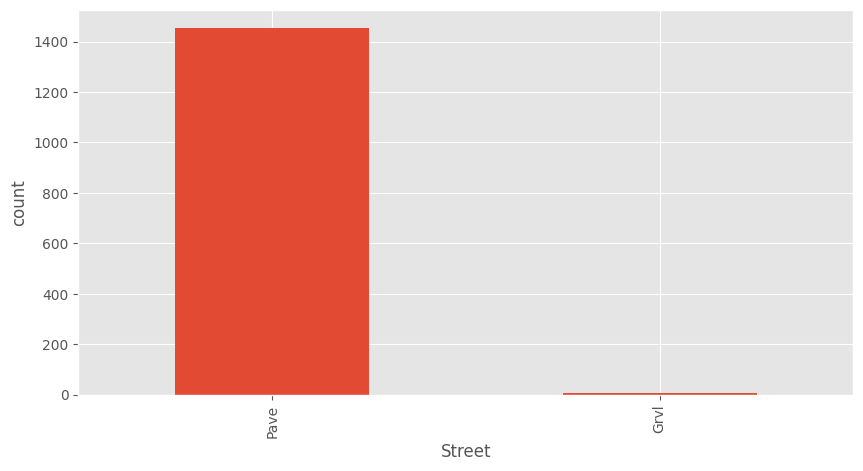

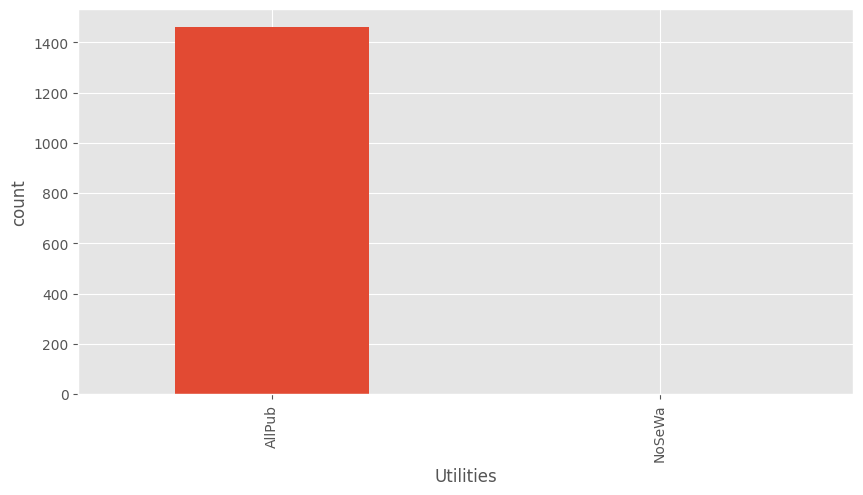

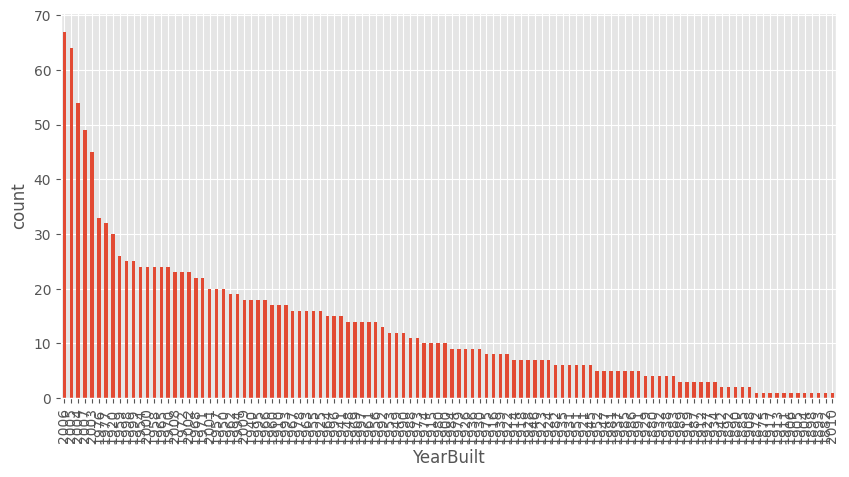

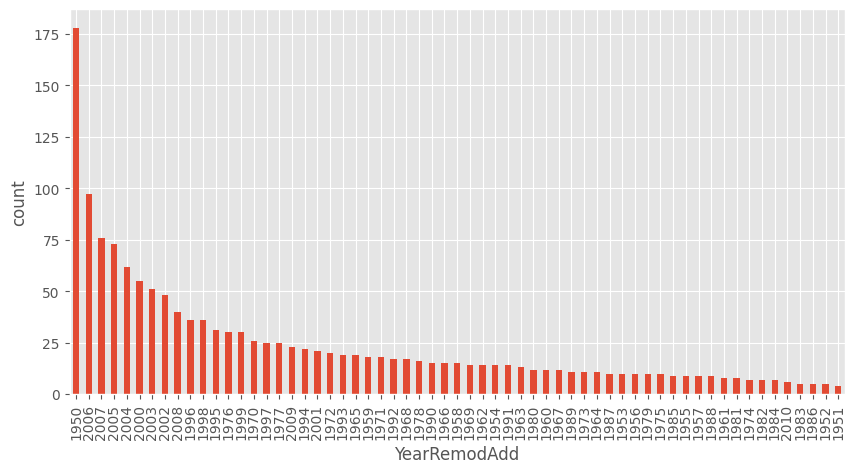

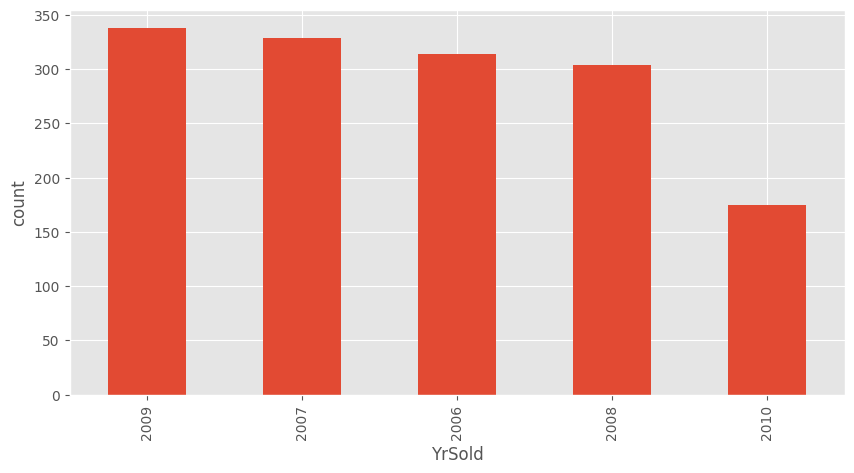

In [63]:
temp = []

for attribute in df.columns:
         if df[attribute].dtype != 'category':
            temp.append(attribute)
            
categoricalDF = df[df.columns.difference(temp)]

for attribute in categoricalDF.columns:
    val = df[attribute].value_counts()
    val.plot(kind = 'bar', figsize = (10, 5))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()

#### **Histograms and bar plots according to the class attributes**

In [64]:
import seaborn as sb

In [65]:
temp = []

for attribute in df.columns:
     if attribute != 'PropertyType' and df[attribute].dtype == 'category':
        temp.append(attribute)
            
numericDF = df[df.columns.difference(temp)]

numericAttributes =  numericDF.columns.difference(['PropertyType'])

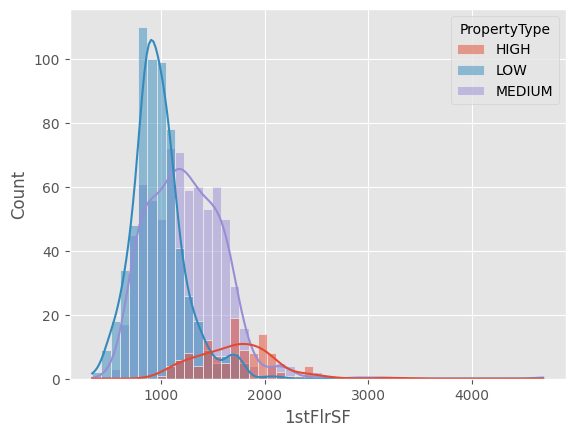

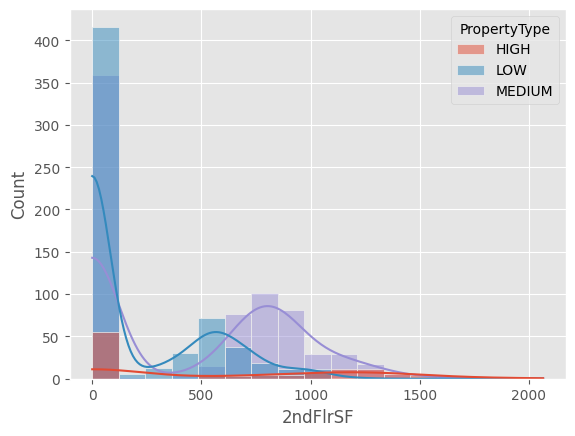

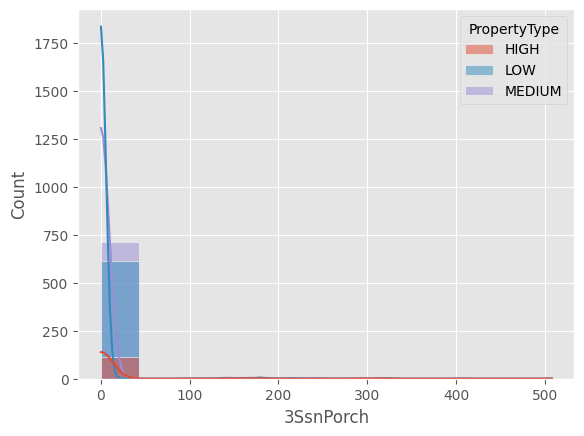

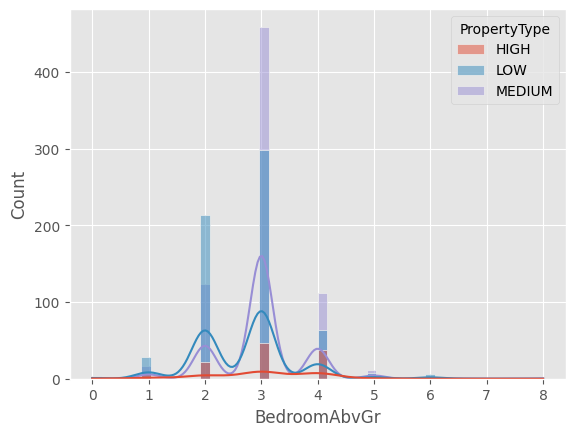

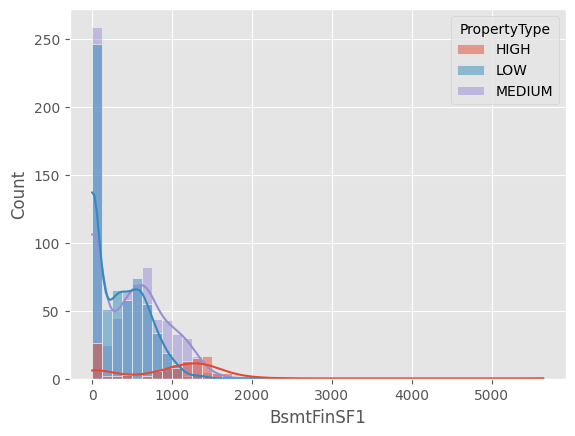

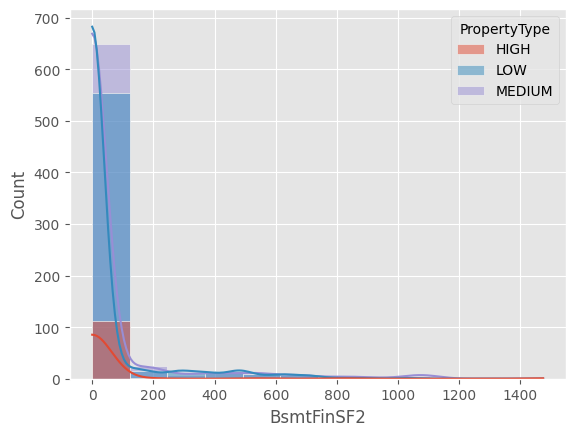

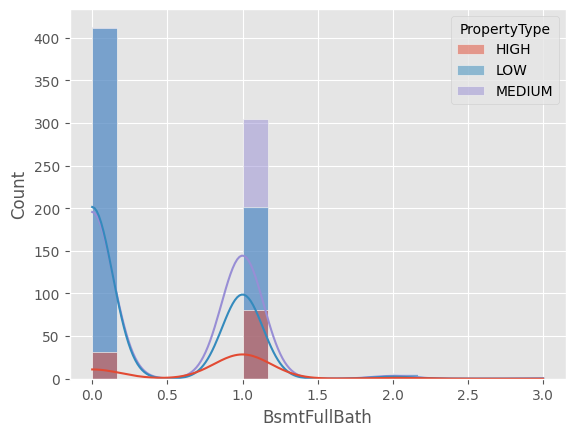

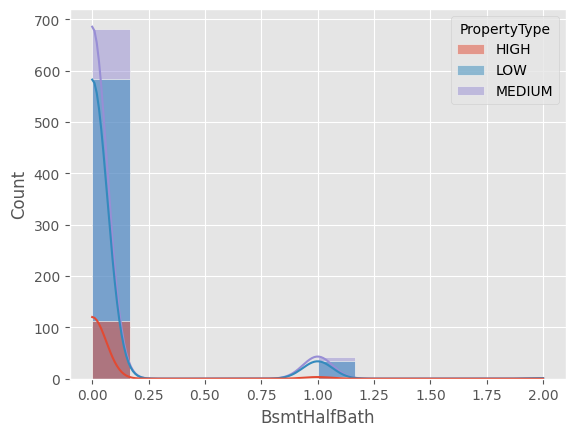

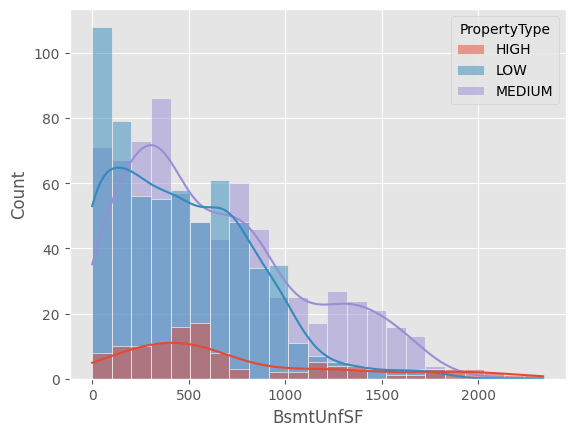

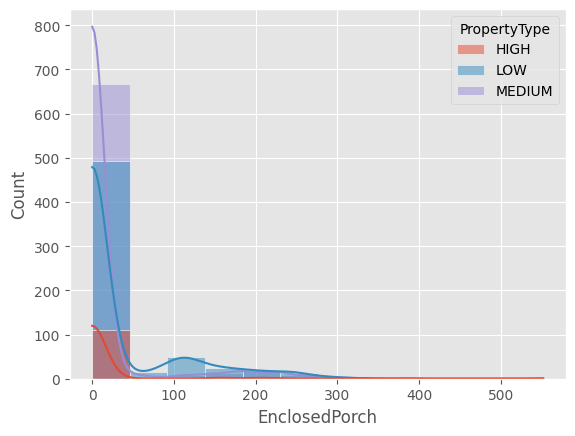

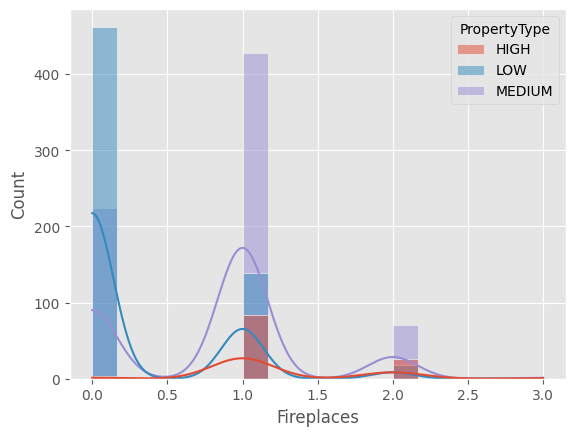

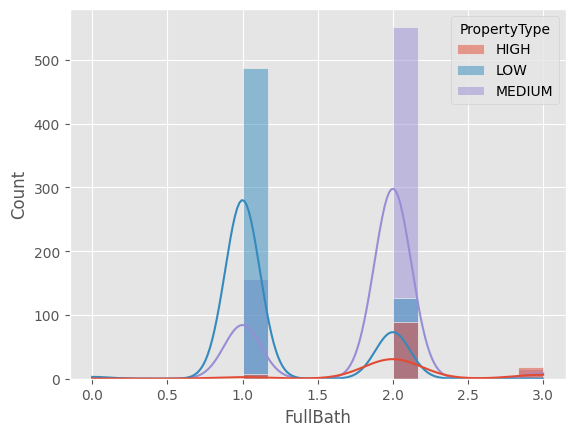

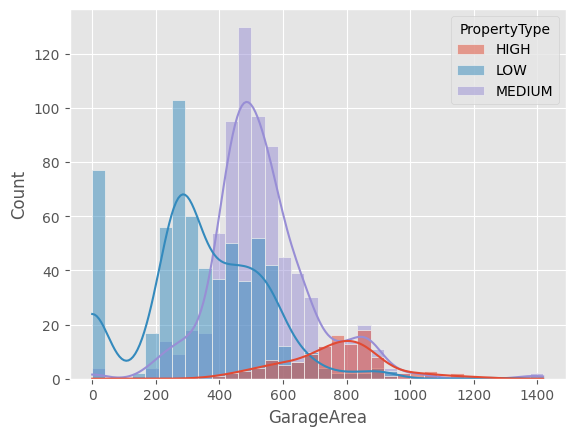

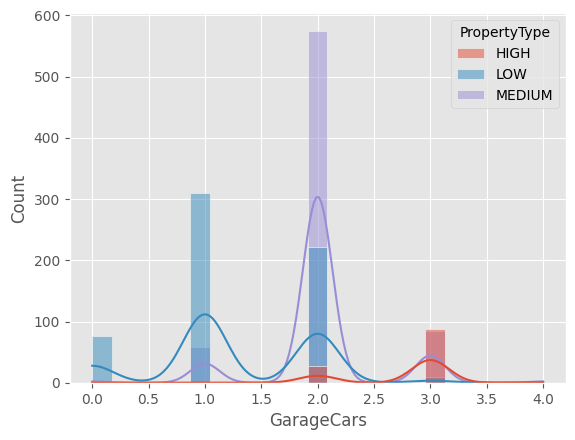

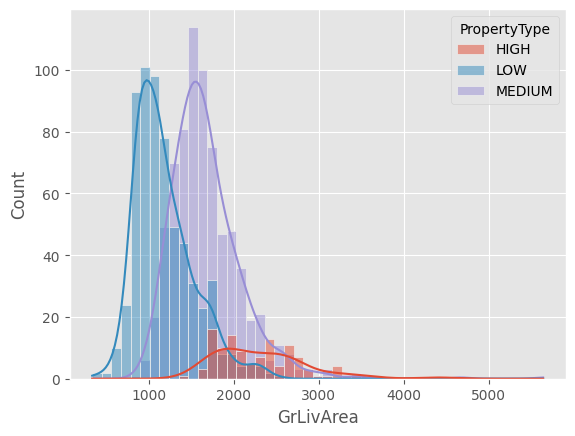

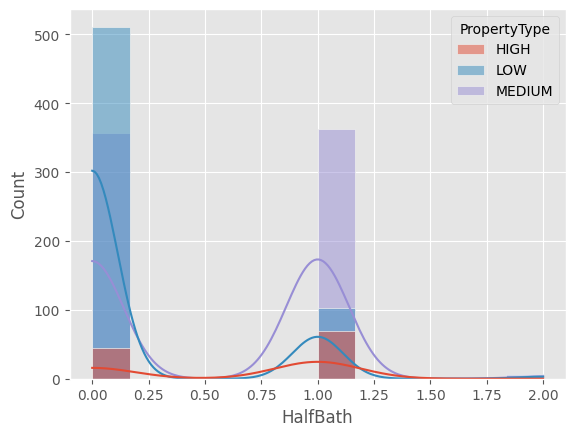

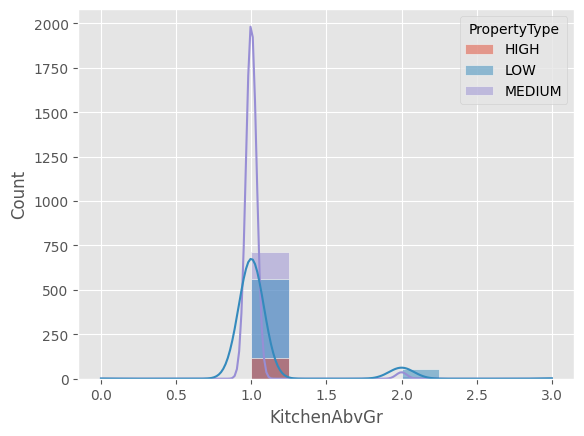

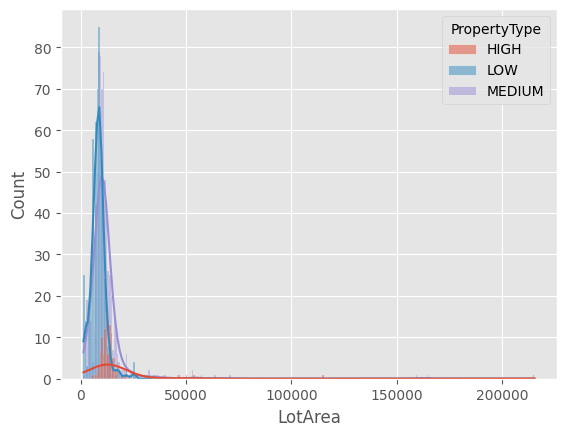

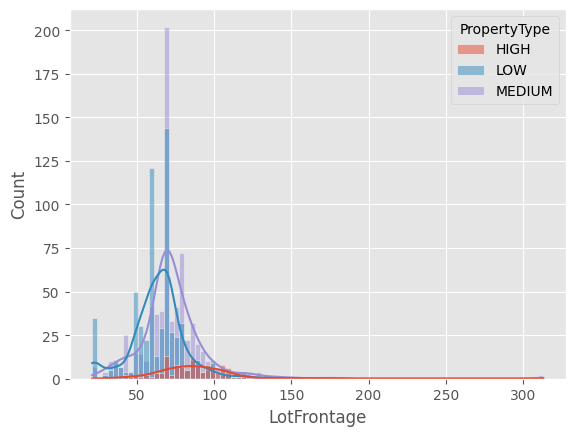

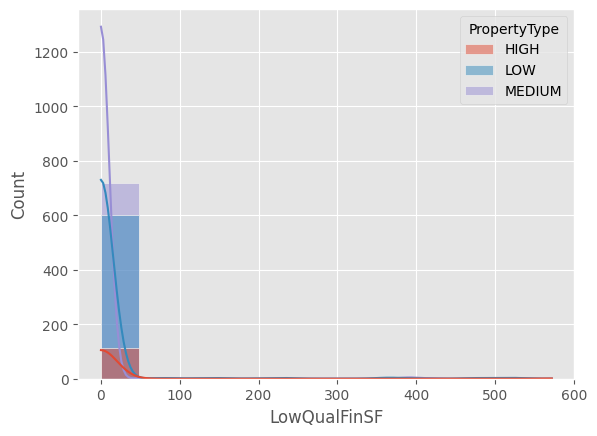

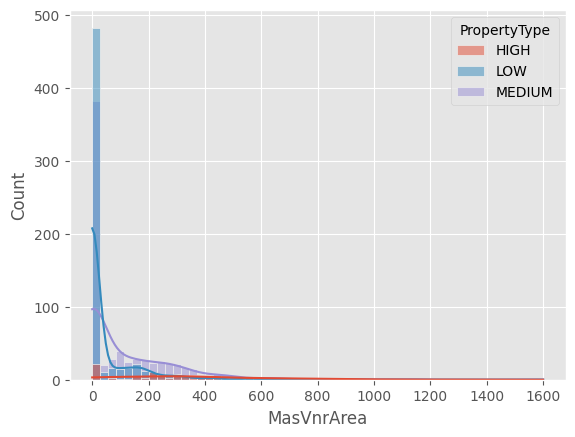

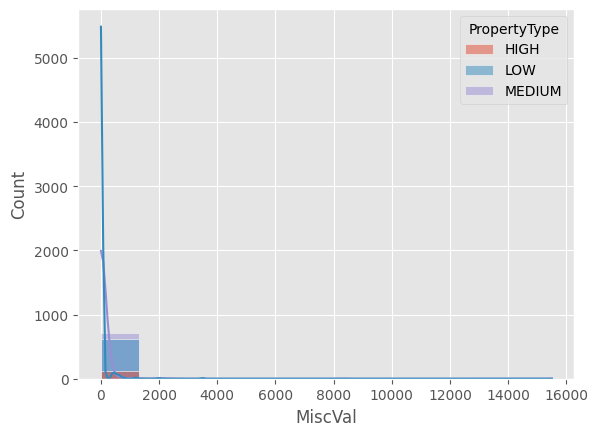

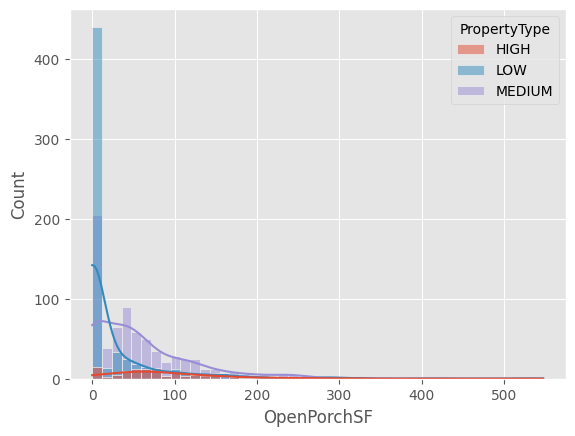

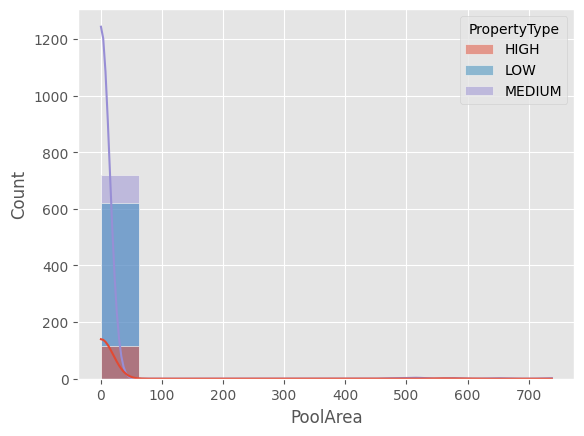

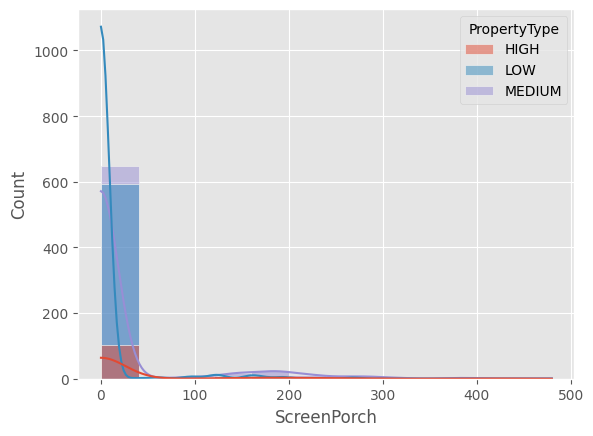

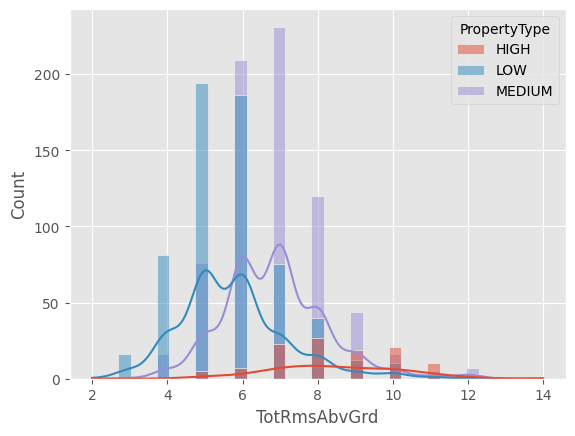

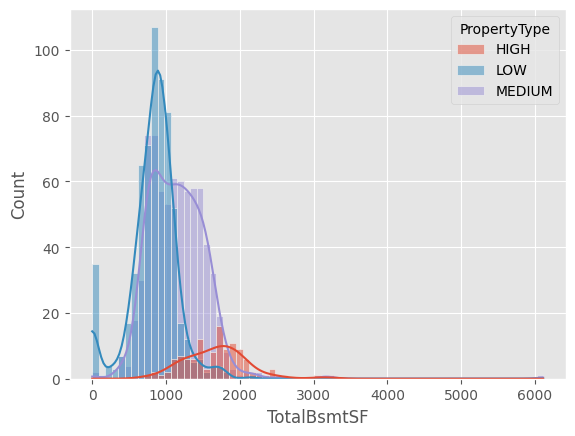

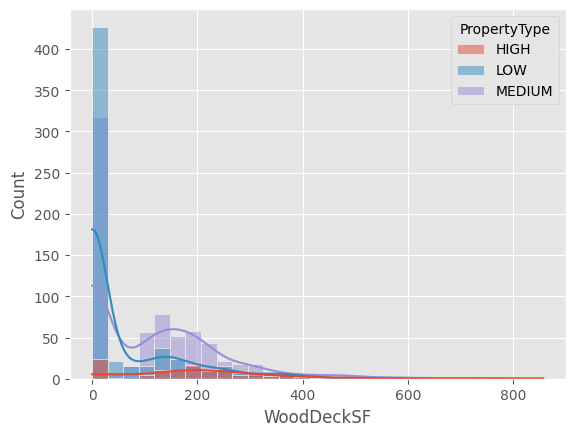

In [66]:
for attribute in numericAttributes:
    sb.histplot(x = df[attribute], hue = 'PropertyType', data = numericDF, kde=True)
    plt.show()

In [67]:
categoricalDF = df[df.columns.difference(numericAttributes)]
categoricalAttributes = categoricalDF.columns.difference(['PropertyType'])

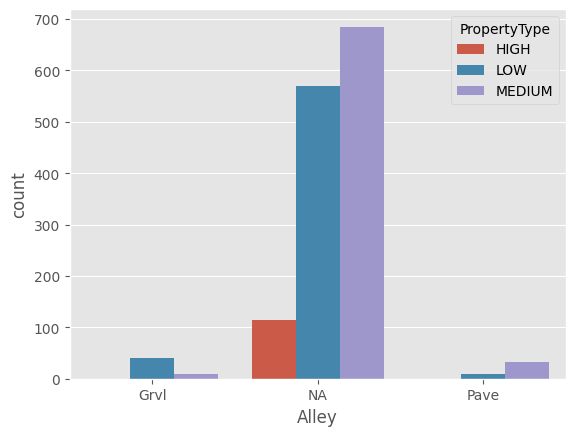

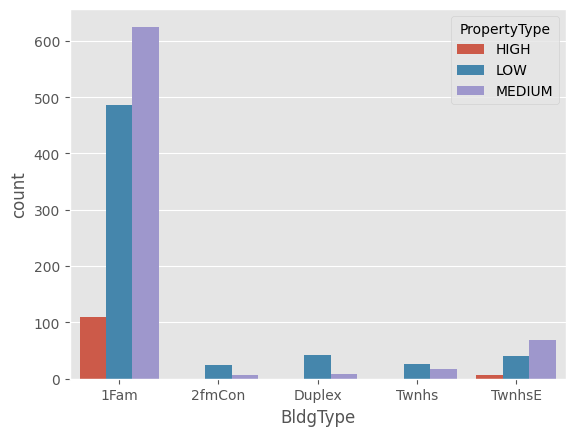

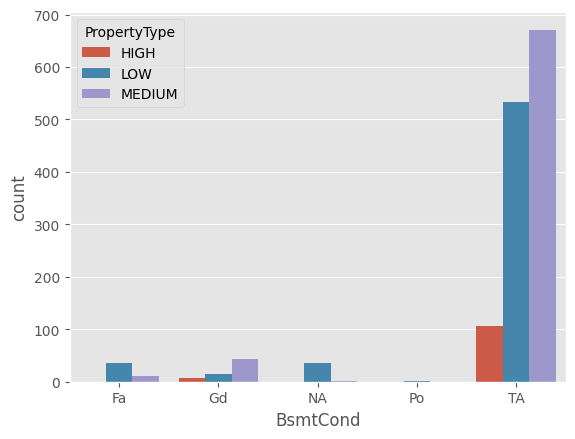

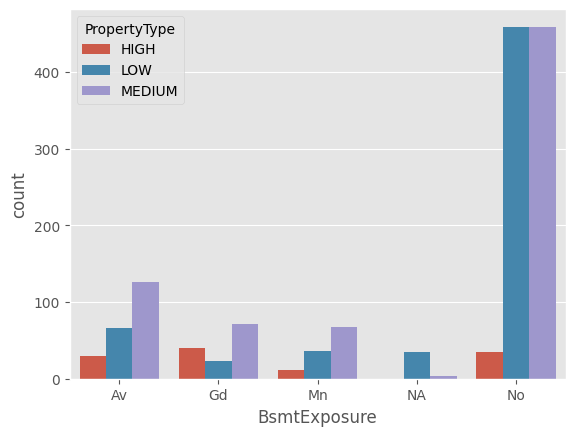

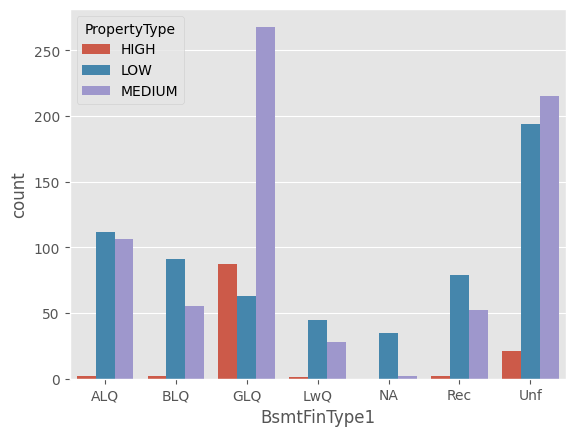

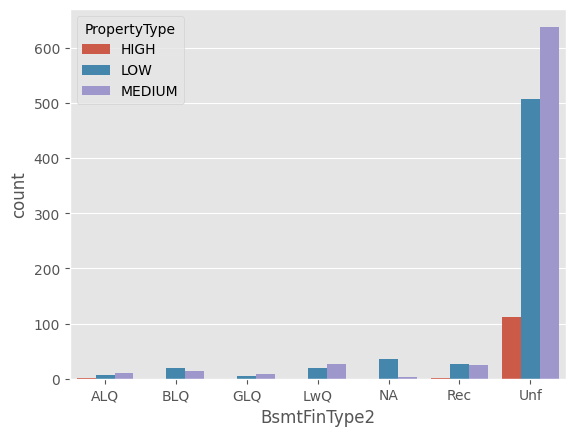

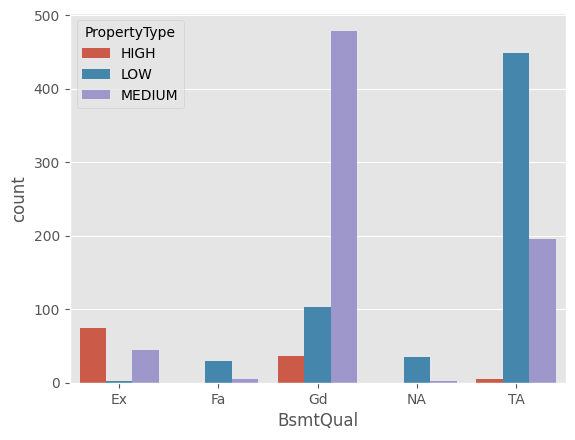

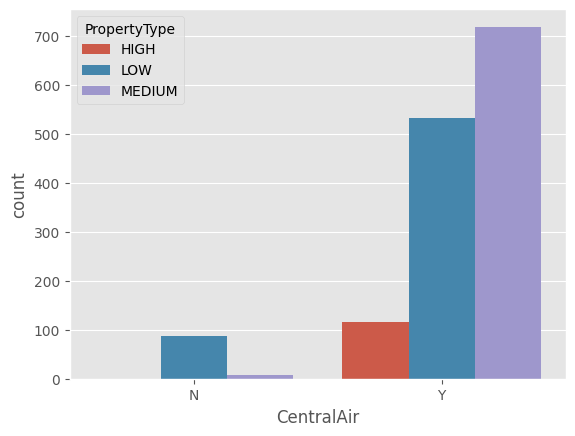

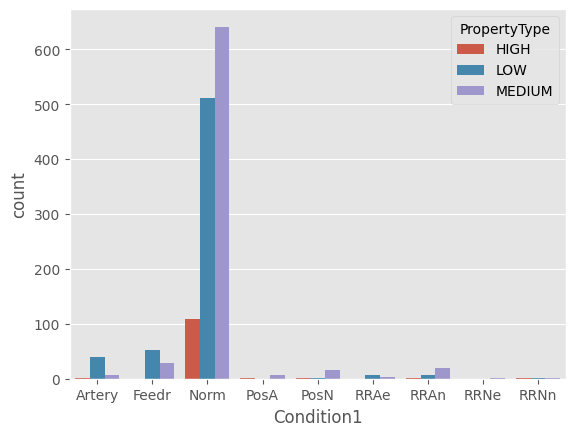

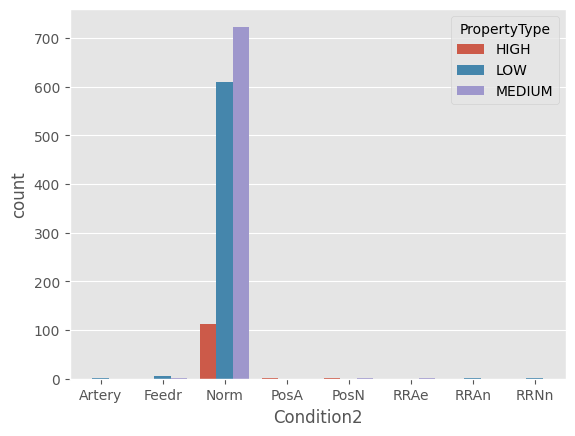

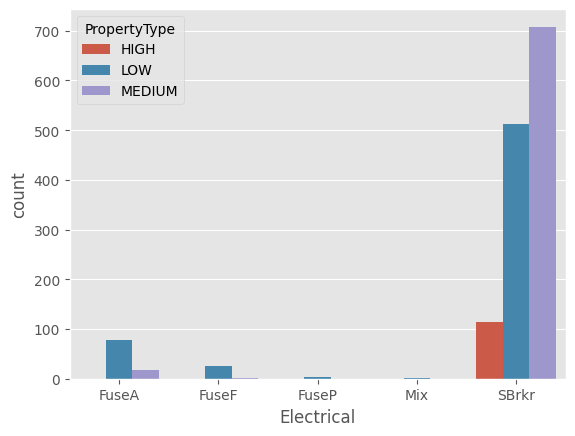

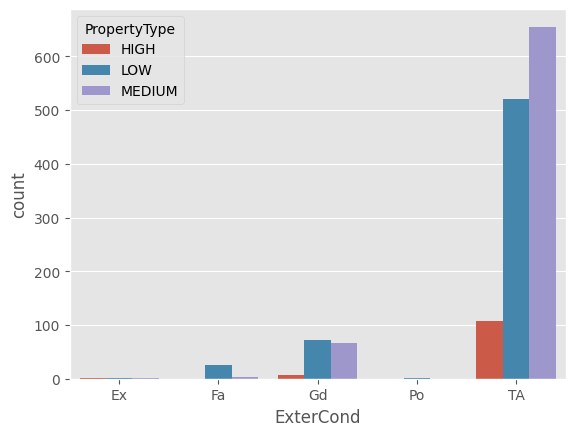

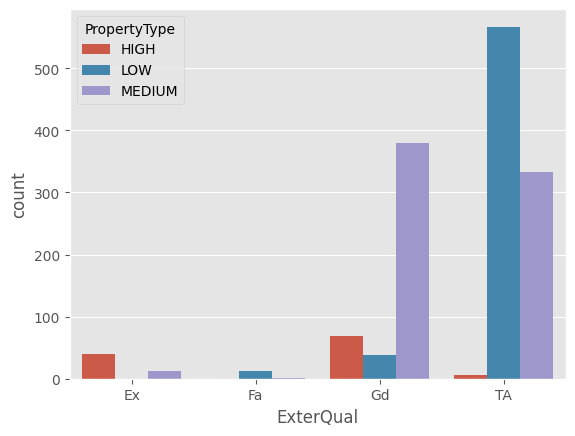

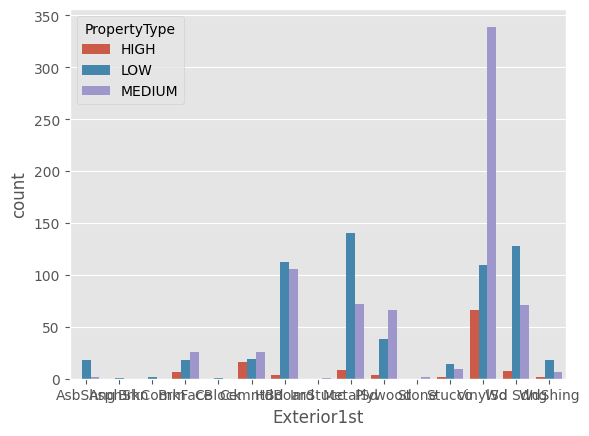

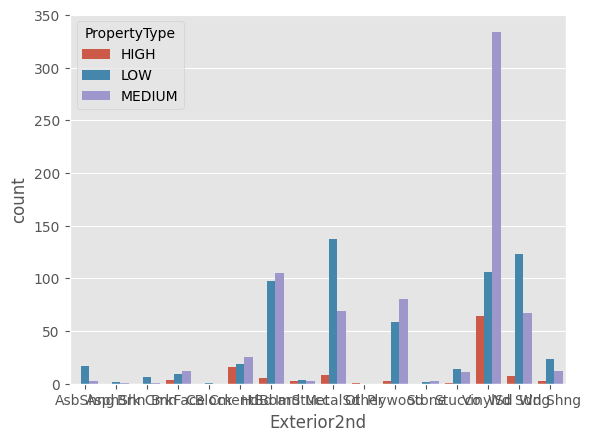

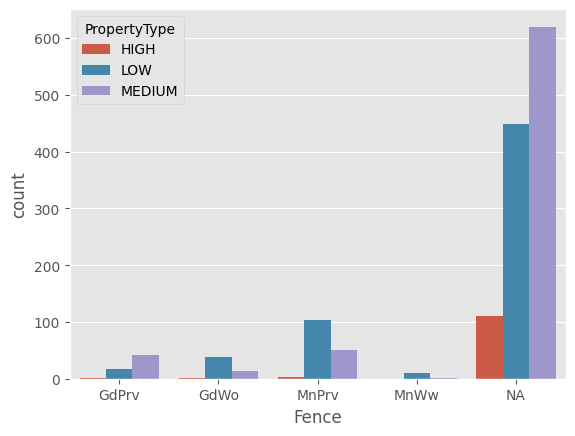

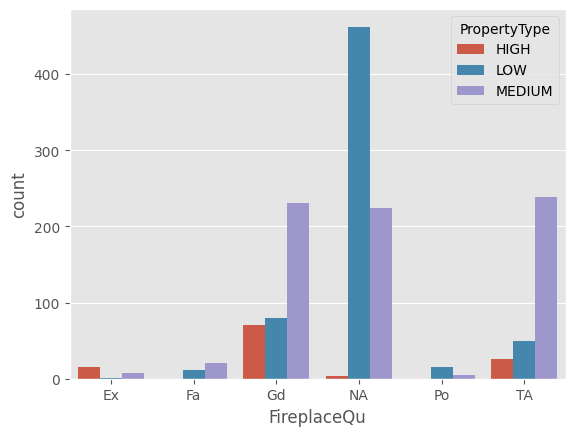

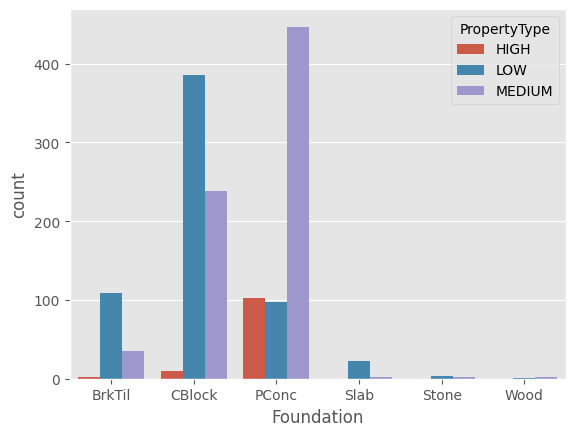

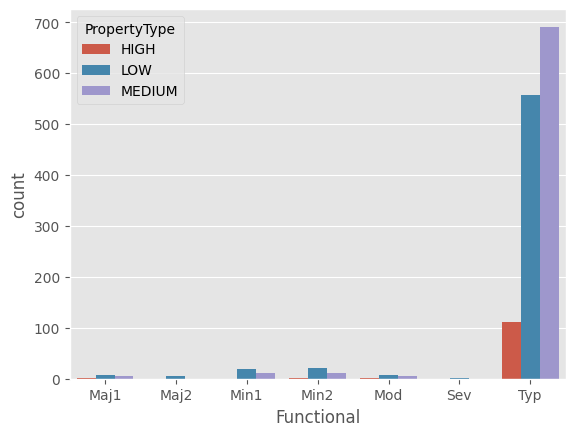

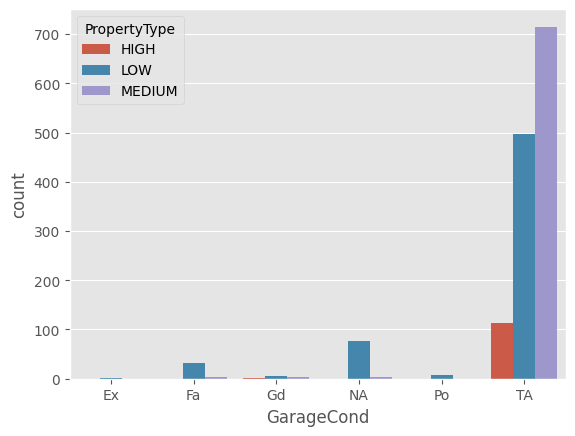

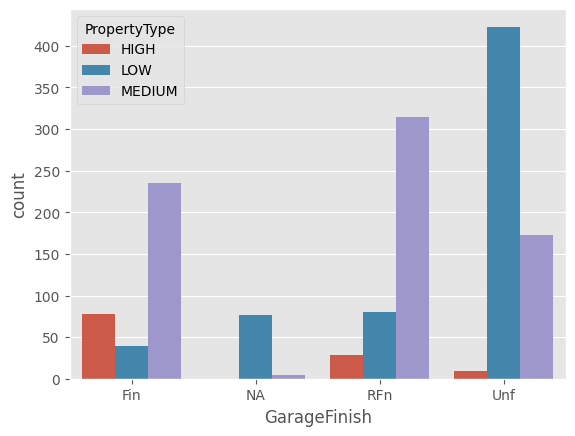

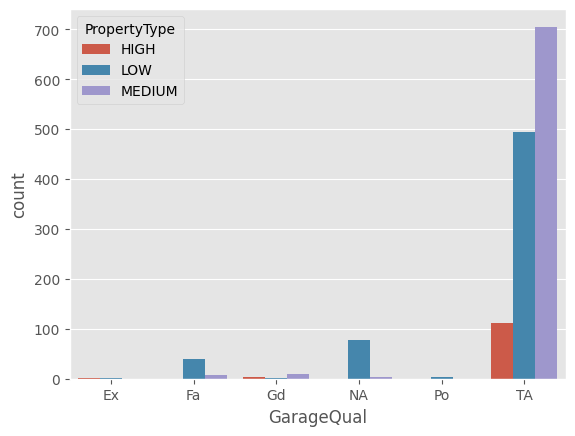

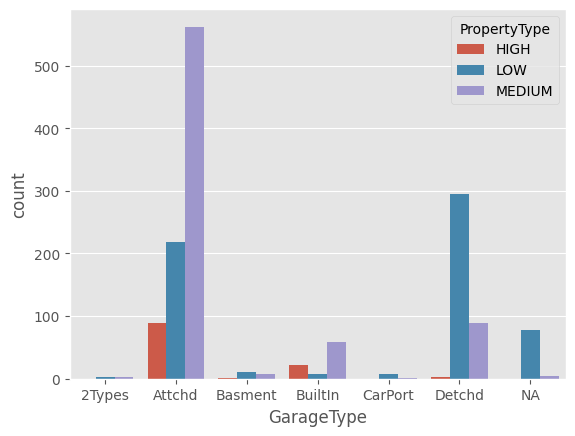

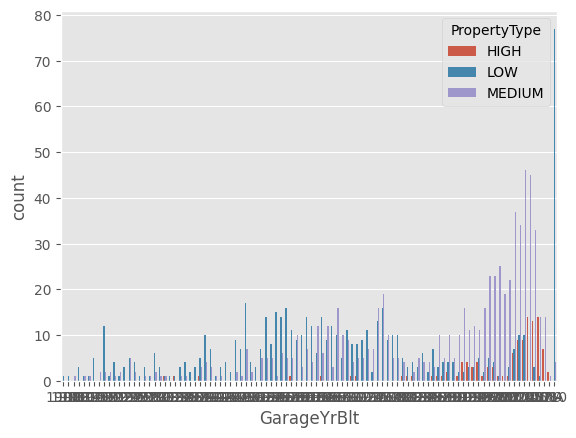

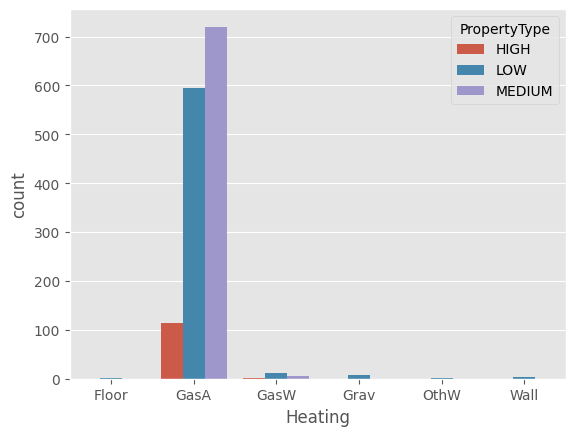

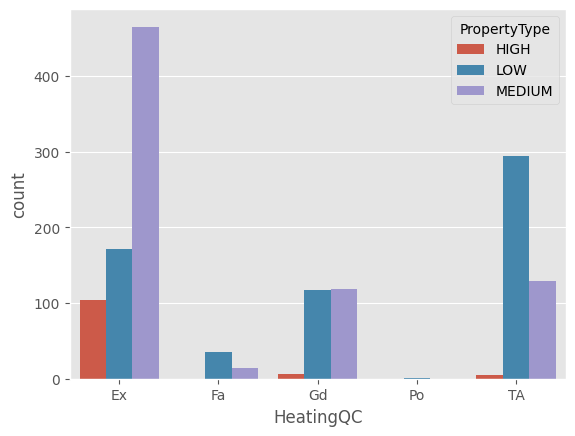

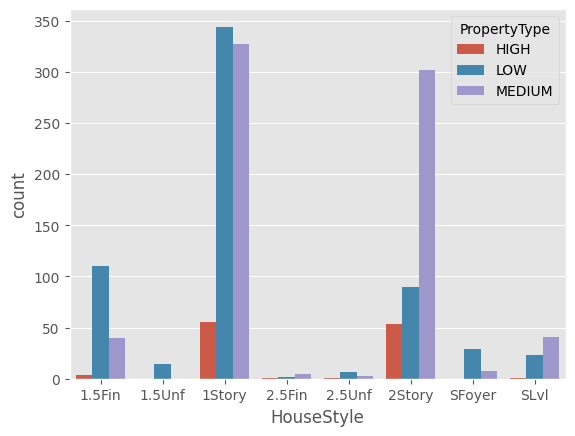

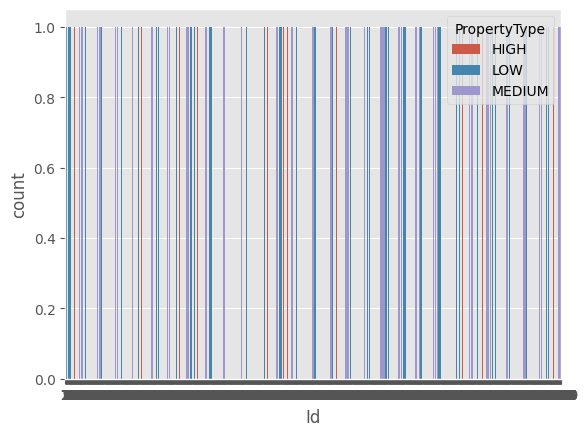

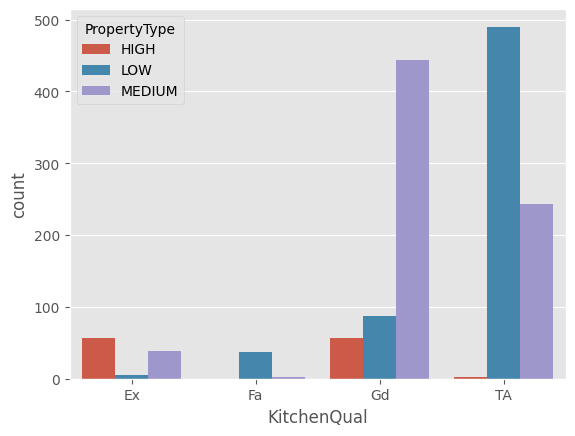

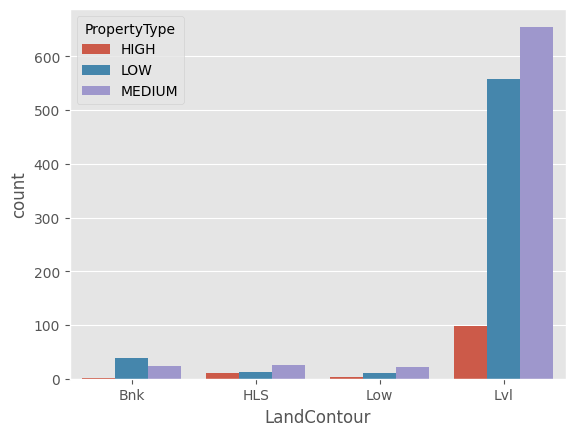

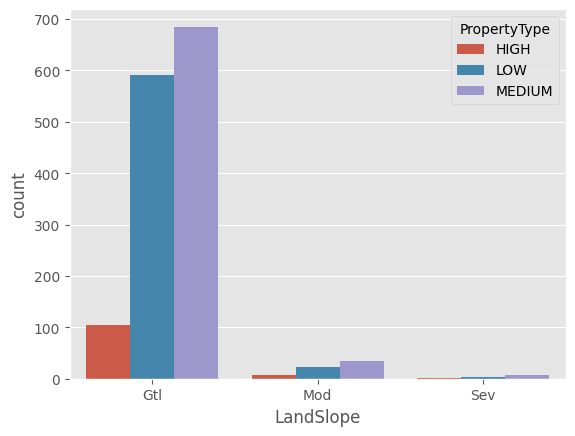

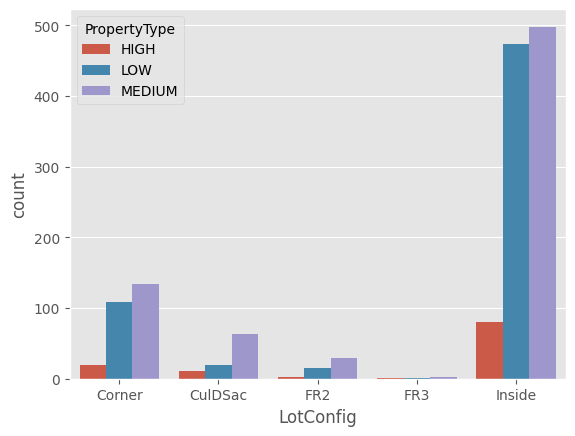

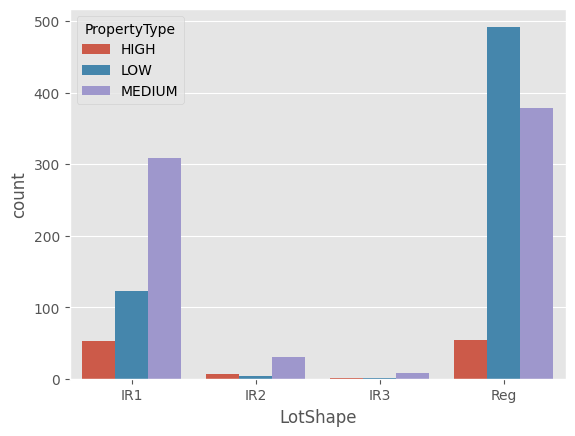

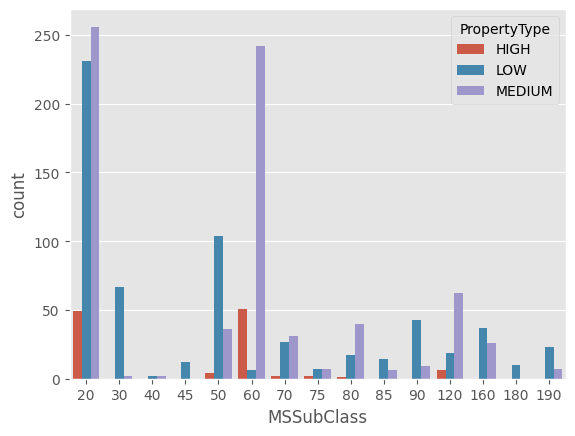

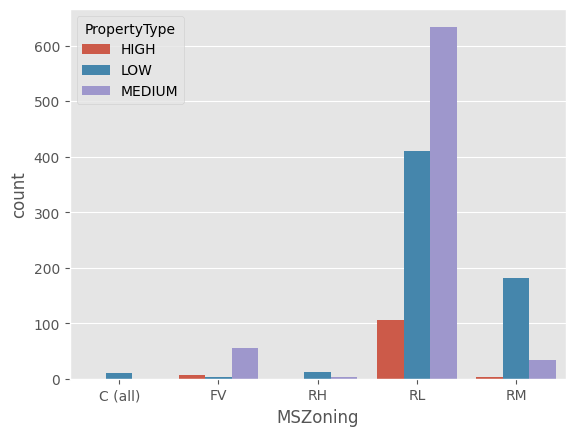

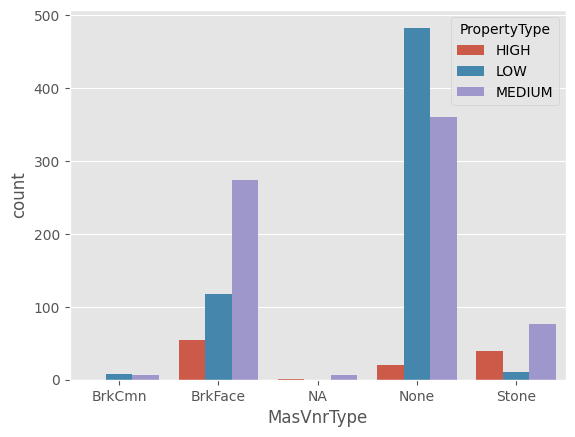

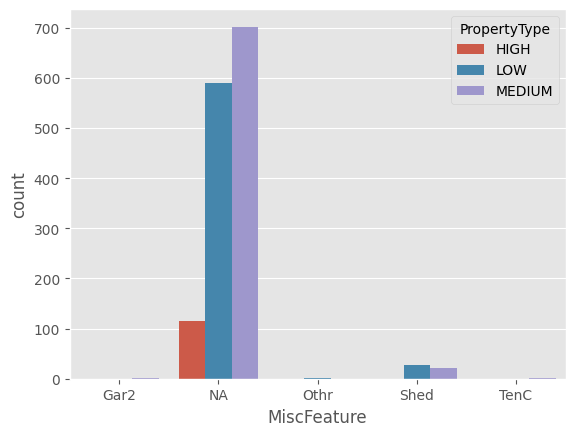

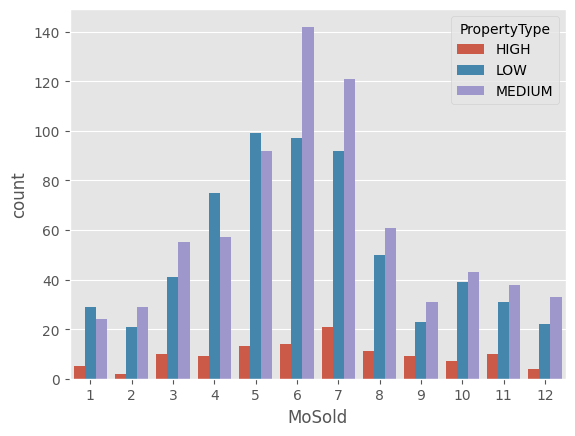

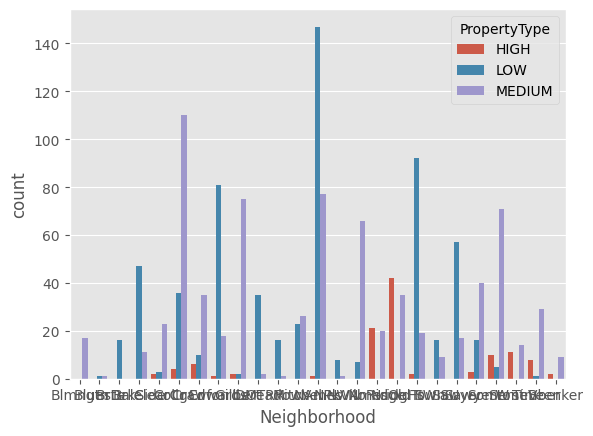

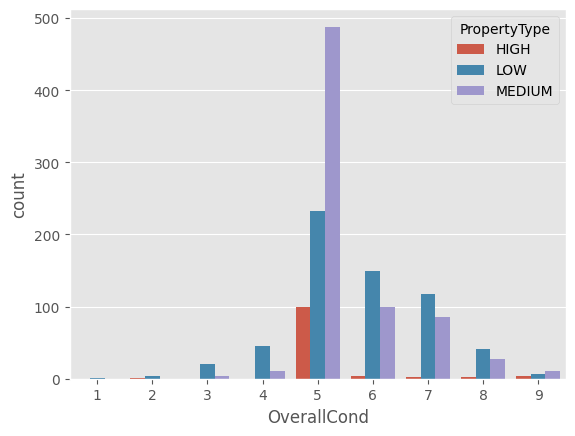

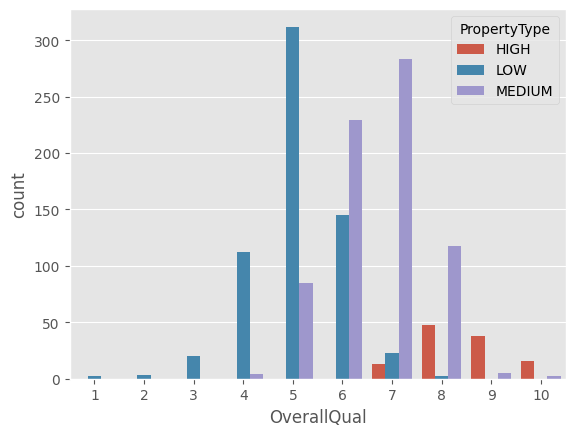

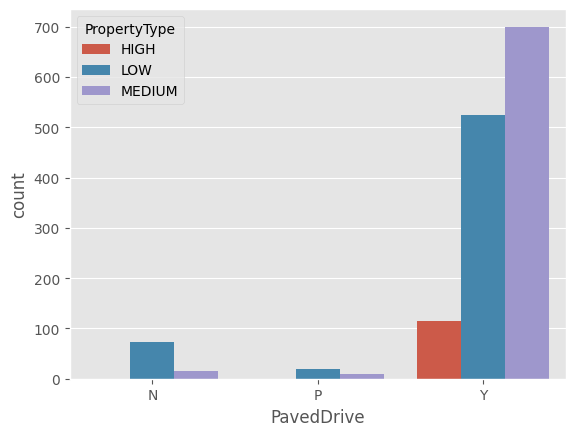

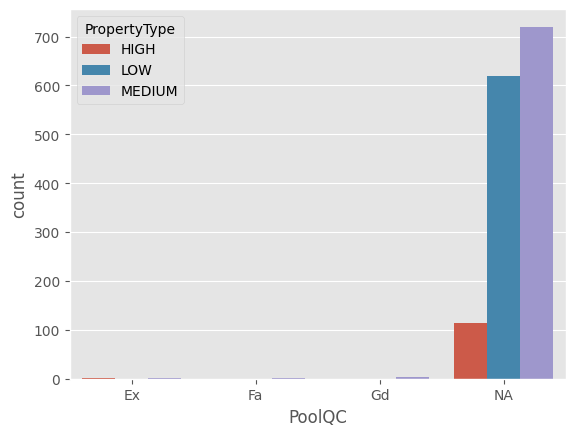

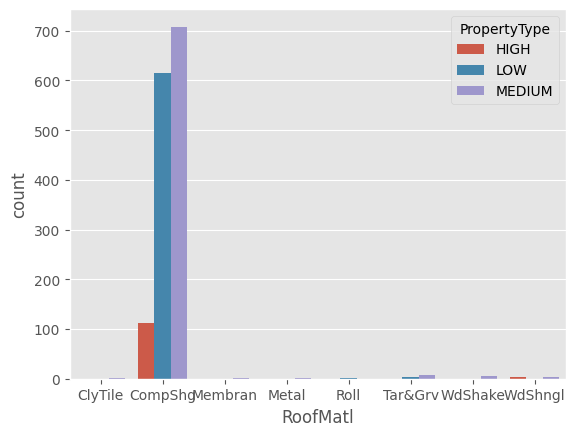

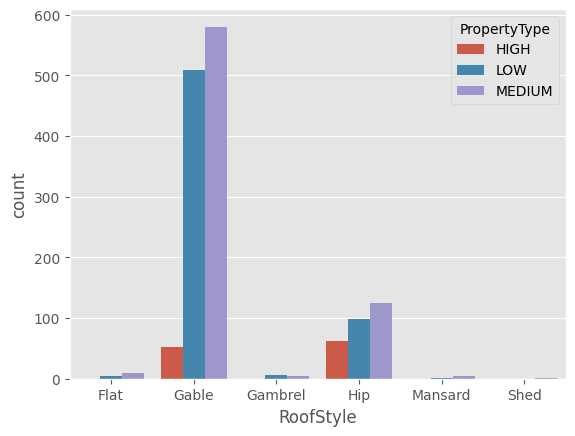

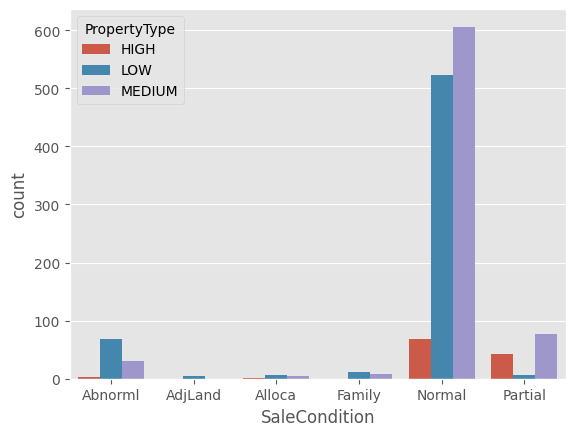

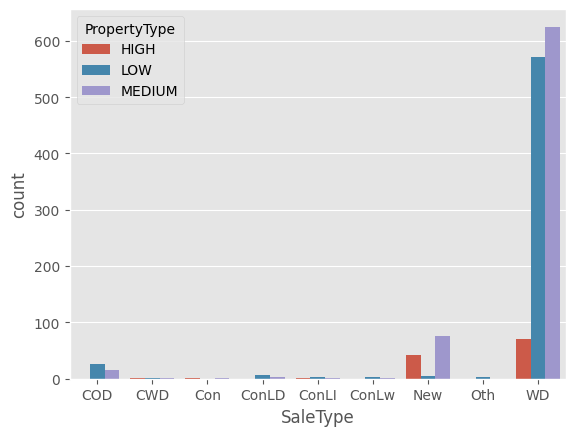

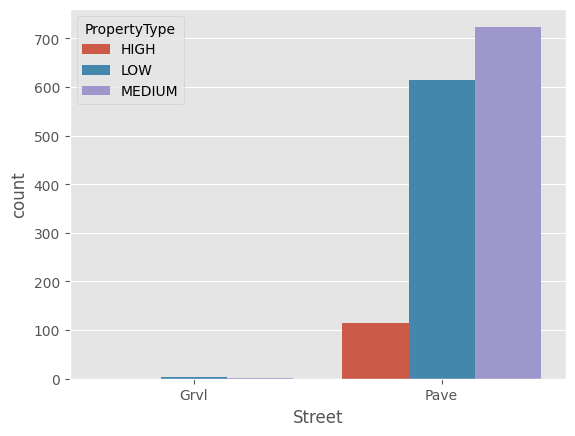

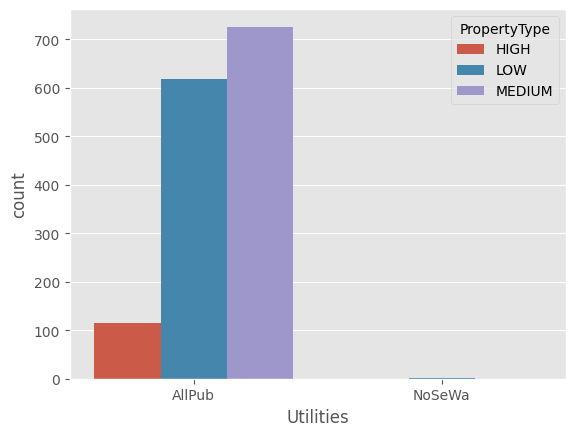

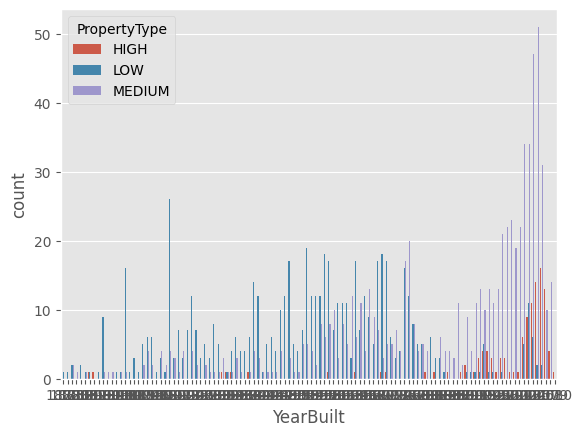

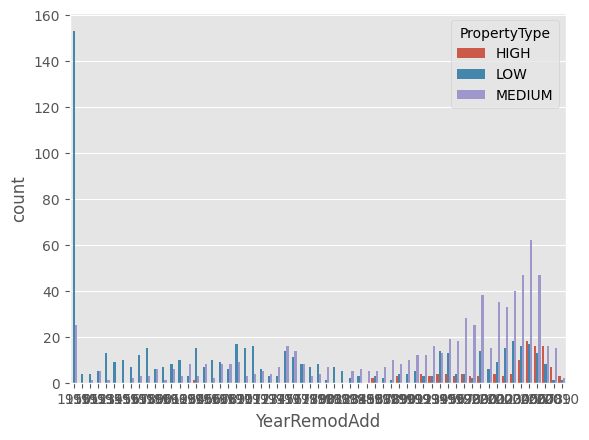

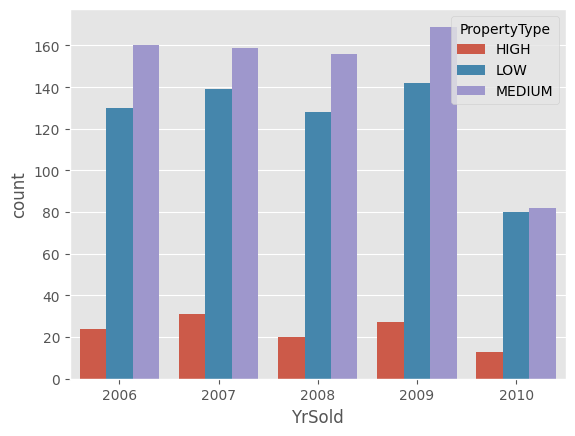

In [68]:
for attribute in categoricalAttributes:
    if attribute == 'state':
        plt.figure(figsize = (15, 10))
    sb.countplot(x = df[attribute], hue = 'PropertyType', data = categoricalDF)
    plt.show()

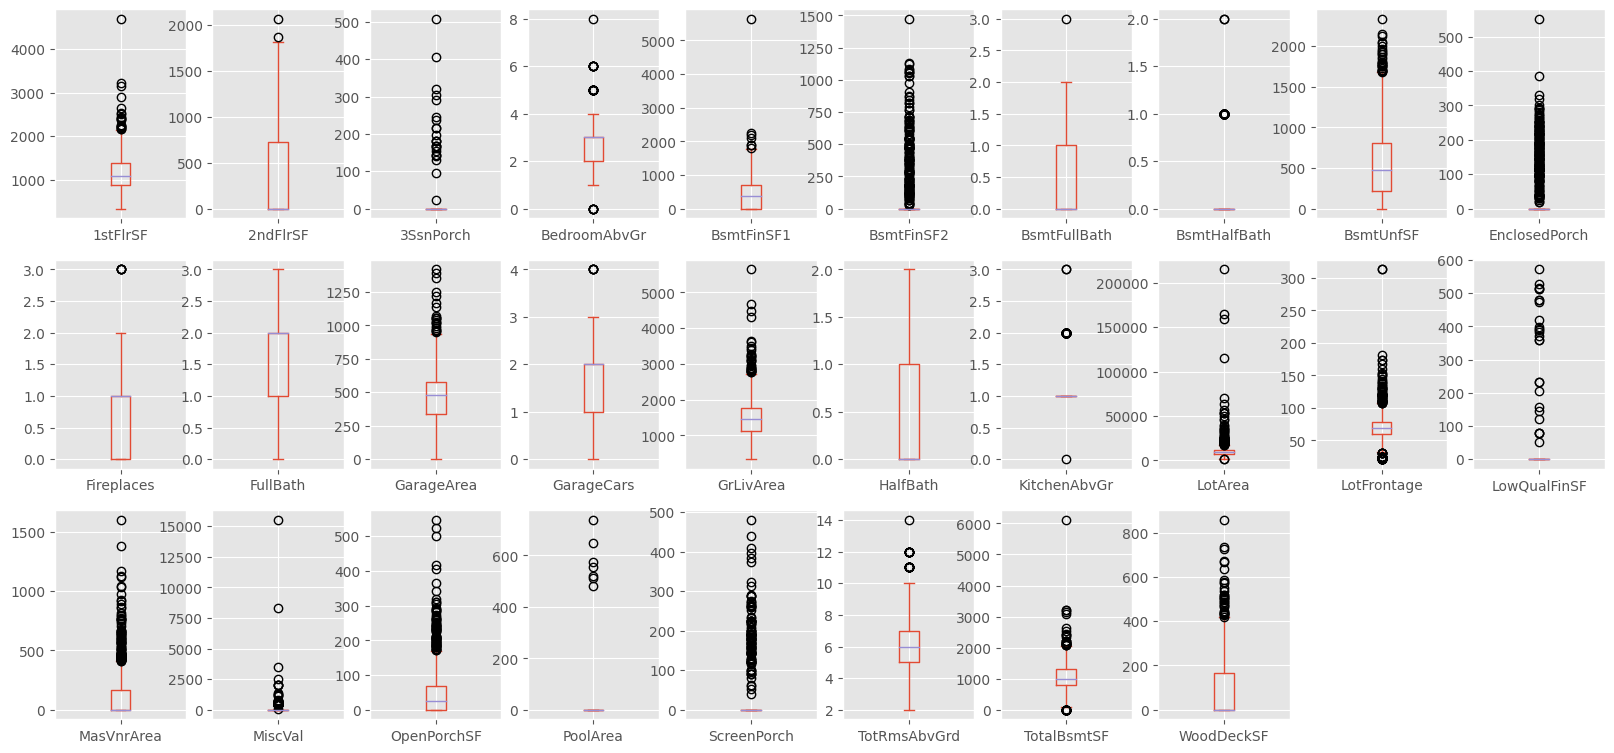

In [69]:
numericDF.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20, 32), layout=(10, 10))
plt.show()

In [70]:
#sb.pairplot(numericDF, hue = 'PropertyType')
#plt.show()

In [71]:
#plt.figure(figsize=(15, 7))
#sb.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma', fmt='.2f')
#plt.show()

### **Data Preparation**

##### *Remove all the attributes with too high (typically IDs) or too low variability (column that exhibit the same value for all the records) and all redundat attribute*

In [72]:
#Id, utilities, street, condition2, PoolQC(?), MiscVal, LowQualFinSF, PoolArea
df = df[df.columns.difference(
    ['Id', 'Utilities', 'Street', 'Condition2', 'MiscVal', 'LowQualFinSF', 'PoolArea', 'PoolQC'])]

In [73]:
df.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0    NA             3     1Fam       TA   
1      1262         0          0    NA             3     1Fam       TA   
2       920       866          0    NA             3     1Fam       TA   
3       961       756          0    NA             3     1Fam       Gd   
4      1145      1053          0    NA             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... RoofStyle SaleCondition  SaleType  \
0           No         706           0  ...     Gable        Normal        WD   
1           Gd         978           0  ...     Gable        Normal        WD   
2           Mn         486           0  ...     Gable        Normal        WD   
3           No         216           0  ...     Gable       Abnorml        WD   
4           Av         655           0  ...     Gable        Normal        WD   

   ScreenPorch TotRmsAbvGrd  TotalBsmtSF WoodDeckSF YearBuilt YearRemodAdd  \
0            0            8          856          0      2003         2003   
1            0            6         1262        298      1976         1976   
2            0            6          920          0      2001         2002   
3            0            7          756          0      1915         1970   
4            0            9         1145        192      2000         2000   

   YrSold  
0    2008  
1    2007  
2    2008  
3    2006  
4    2008  

[5 rows x 73 columns]

##### *Discretize 'Something'*

In [74]:
#BedroomAbvGr
#BsmtFullBath
#BsmtHalfBath
#Fireplaces
#FullBath
#GarageCars
#HalfBath
df['BedroomAbvGr_disc'] = pd.cut(df['BedroomAbvGr'].values, bins =(1.5, 2.5, 3.5, 4.5), labels = ('Low','Medium','High'))
df['BedroomAbvGr_disc'] = df['BedroomAbvGr_disc'].astype('category')

df['BsmtFullBath_disc'] = pd.cut(df['BsmtFullBath'].values, bins =(-0.1, 0.5, 1.5), labels = ('Low','High'))
df['BsmtFullBath_disc'] = df['BsmtFullBath_disc'].astype('category')

In [75]:
df.drop(columns=['BedroomAbvGr','BsmtFullBath'], inplace = True)

##### *Binarization*

In [76]:
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('PropertyType')
df2 = pd.get_dummies(df, columns = cat_attributes)
new_attr_list = list(df2.columns)
new_attr_list.remove('PropertyType')
df2 = df2[new_attr_list]
df2.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BsmtFinSF1  BsmtFinSF2  BsmtHalfBath  \
0       856       854          0         706           0             0   
1      1262         0          0         978           0             1   
2       920       866          0         486           0             0   
3       961       756          0         216           0             0   
4      1145      1053          0         655           0             0   

   BsmtUnfSF  EnclosedPorch  Fireplaces  FullBath  ...  YrSold_2006  \
0        150              0           0         2  ...            0   
1        284              0           1         2  ...            0   
2        434              0           1         2  ...            0   
3        540            272           1         1  ...            1   
4        490              0           1         2  ...            0   

   YrSold_2007  YrSold_2008  YrSold_2009  YrSold_2010  BedroomAbvGr_disc_Low  \
0            0            1            0            0                      0   
1            1            0            0            0                      0   
2            0            1            0            0                      0   
3            0            0            0            0                      0   
4            0            1            0            0                      0   

   BedroomAbvGr_disc_Medium  BedroomAbvGr_disc_High  BsmtFullBath_disc_Low  \
0                         1                       0                      0   
1                         1                       0                      1   
2                         1                       0                      0   
3                         1                       0                      0   
4                         0                       1                      0   

   BsmtFullBath_disc_High  
0                       1  
1                       0  
2                       1  
3                       1  
4                       1  

[5 rows x 601 columns]

In [77]:
df['PropertyType'].replace({False: 0, True: 1}, inplace = True)

### **Modeling**

##### split dataset

In [78]:
from sklearn.model_selection import train_test_split
import numpy as np

In [79]:
x = np.array(df2.values)
y = np.array(df['PropertyType'].values)

seed = 101
test_size = .3
val_size = .2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

##### create the models

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

In [81]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))


# evaluate each model in turn

for name, model in models:
    print(name)
    
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    
    print('Classification metrics: ')
    print(classification_report(y_val, y_val_pred))

C45
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.75      0.71      0.73        17
         LOW       0.79      0.84      0.82        87
      MEDIUM       0.80      0.77      0.79       101

    accuracy                           0.80       205
   macro avg       0.78      0.77      0.78       205
weighted avg       0.80      0.80      0.79       205

CART
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.75      0.71      0.73        17
         LOW       0.76      0.84      0.80        87
      MEDIUM       0.81      0.74      0.77       101

    accuracy                           0.78       205
   macro avg       0.77      0.76      0.77       205
weighted avg       0.78      0.78      0.78       205

GaussianNaiveBayes
Classification metrics: 
              precision    recall  f1-score   support

        HIGH       0.34      0.88      0.49        17
         LOW       0.87   

##### Evaluation

##### do predictions on test set

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [83]:
model = DecisionTreeClassifier(criterion='entropy', random_state=seed)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [84]:
print(f'Accuracy: {accuracy_score(y_test, predictions):.2f}')

Accuracy: 0.78


In [85]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

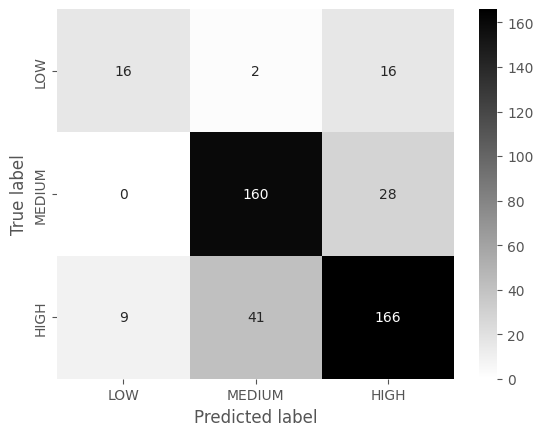

In [86]:
categories = ['LOW','MEDIUM','HIGH']
make_confusion_matrix(confusion_matrix(y_test, predictions), categories=categories, cmap='binary')

In [87]:
print('Classification report')
print(classification_report(y_test, predictions))

Classification report
              precision    recall  f1-score   support

        HIGH       0.64      0.47      0.54        34
         LOW       0.79      0.85      0.82       188
      MEDIUM       0.79      0.77      0.78       216

    accuracy                           0.78       438
   macro avg       0.74      0.70      0.71       438
weighted avg       0.78      0.78      0.78       438



##### **Compute the Roc Curve for each class**

In [88]:
from sklearn.metrics import roc_curve, auc

In [89]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['PropertyType']))

probs = []

for _, model in models:
    model.fit(x_train, y_train)
    probs.append(model.predict_proba(x_test))

Iteration 1, loss = 20.33628078
Iteration 2, loss = 16.63969486
Iteration 3, loss = 16.32784399
Iteration 4, loss = 14.86872558
Iteration 5, loss = 12.56194313
Iteration 6, loss = 10.00159865
Iteration 7, loss = 7.98199240
Iteration 8, loss = 8.14273585
Iteration 9, loss = 6.69772438
Iteration 10, loss = 6.05245725
Iteration 11, loss = 5.79410866
Iteration 12, loss = 4.73671236
Iteration 13, loss = 3.98283580
Iteration 14, loss = 5.70131301
Iteration 15, loss = 4.20162001
Iteration 16, loss = 3.41060362
Iteration 17, loss = 2.65578786
Iteration 18, loss = 2.43745132
Iteration 19, loss = 2.18369013
Iteration 20, loss = 2.96020789
Iteration 21, loss = 3.34141333
Iteration 22, loss = 2.73476372
Iteration 23, loss = 3.05975890
Iteration 24, loss = 3.03807654
Iteration 25, loss = 2.24367042
Iteration 26, loss = 1.88522933
Iteration 27, loss = 1.92920412
Iteration 28, loss = 2.65303830
Iteration 29, loss = 2.24673484
Iteration 30, loss = 3.25108697
Iteration 31, loss = 2.56314511
Iteration 3

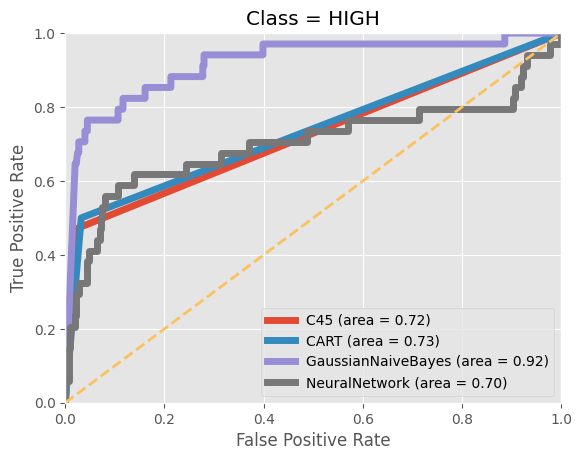

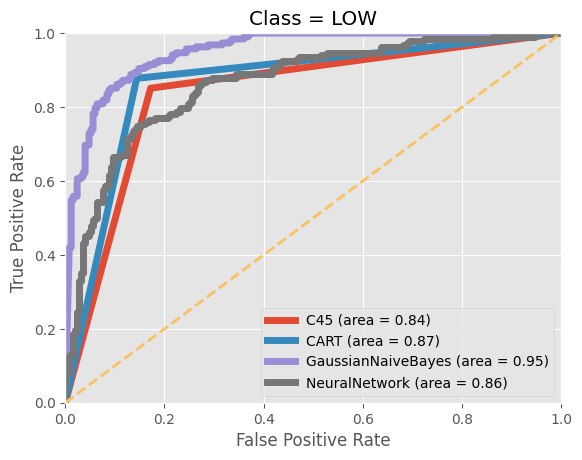

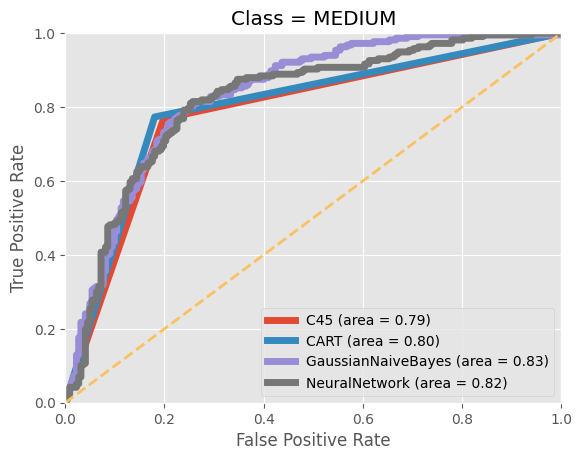

In [90]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

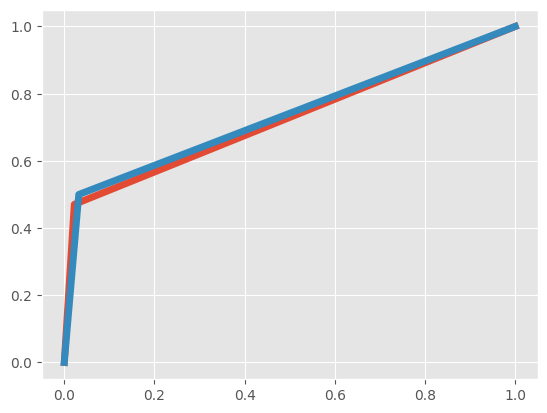

In [91]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        print(one_hot_encoding[:, i])
        print(probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1
        
        if m==2:
            break
    break

In [92]:
one_hot_encoding[:, 0]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [93]:
probs[m][:, 0]

array([9.99980678e-01, 9.47031694e-49, 1.44751065e-30, 1.00000000e+00,
       1.00000000e+00, 2.11568863e-57, 4.47578523e-53, 5.31627316e-17,
       9.54762763e-29, 2.46778325e-24, 1.37972203e-38, 4.37025479e-19,
       1.69517446e-27, 5.22475263e-23, 2.40924137e-11, 6.33949327e-10,
       1.02606550e-37, 1.39879895e-42, 3.36403289e-39, 9.99999846e-01,
       1.40058097e-17, 4.34169217e-83, 6.09803227e-09, 9.01456790e-27,
       1.58467866e-02, 2.65052999e-32, 8.73171691e-49, 1.05325812e-22,
       9.49219143e-01, 4.36361194e-54, 2.32181899e-03, 4.57806578e-35,
       4.27262792e-06, 1.00000000e+00, 6.39201993e-81, 6.34581139e-54,
       1.00000000e+00, 1.01954316e-04, 8.73152269e-62, 3.36293803e-75,
       9.98981912e-01, 7.23439245e-12, 1.19576190e-03, 3.97461760e-18,
       8.14059934e-37, 6.10189796e-47, 1.00000000e+00, 9.99225159e-01,
       7.46240149e-33, 1.59802016e-43, 6.89651177e-33, 1.16543162e-05,
       3.67760641e-43, 1.61164611e-04, 1.67803056e-06, 8.43301857e-34,
      

In [94]:
roc_curve(one_hot_encoding[:, 0], probs[m][:, 0])

(array([0.        , 0.01980198, 0.02227723, 0.02475248, 0.02722772,
        0.02722772, 0.03960396, 0.03960396, 0.04455446, 0.04455446,
        0.10643564, 0.10643564, 0.11633663, 0.11633663, 0.16089109,
        0.16089109, 0.21287129, 0.21287129, 0.27722772, 0.27722772,
        0.27970297, 0.27970297, 0.39851485, 0.39851485, 0.88613861,
        0.88613861, 1.        ]),
 array([0.        , 0.64705882, 0.64705882, 0.67647059, 0.67647059,
        0.70588235, 0.70588235, 0.73529412, 0.73529412, 0.76470588,
        0.76470588, 0.79411765, 0.79411765, 0.82352941, 0.82352941,
        0.85294118, 0.85294118, 0.88235294, 0.88235294, 0.91176471,
        0.91176471, 0.94117647, 0.94117647, 0.97058824, 0.97058824,
        1.        , 1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 9.84921741e-01, 9.84696957e-01,
        9.48839601e-01, 9.46624659e-